# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns


In [6]:
##!pip install matplotlib == 3.10.0 #### run to install specific version of matplotlib
import matplotlib.pyplot as plt

In [7]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

In [45]:
df = pd.read_parquet('2023-1.parquet') ##have included all praquet fuiles in same folder as the jupyter file
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [30]:
df.info()
df.shape[0]
##As the shape of first column of df is 3041714, the number of rows is 3041714

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

3041714

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

Response--> 
##As the shape of first column of df is 3041714, the number of rows is 3041714.
##Computationally, it might not be very feasible or a good idea to perform all heavy EDA based operation on all the records, given its large volume.
##We can treat the overall data as Universal set and consider a chunk of data volumne from it that can be called as sample population, which will be good representation of the universal set.
As suggested below, to keep teh data impartial from timeseries perspectiev and to negeate the biase, we can a take 5% data from all hourly data present in the data sheet, and form our sample population data frame.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [55]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

sampled_data = pd.DataFrame()

# Select the folder having data files
os.chdir(r'C:\Users\Shanks\Downloads\EDA NYC assignment\Starter Notebook - EDA NYC Taxi\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_temp = pd.DataFrame()
        df_temp = pd.read_parquet(file_path) 
        day_data = pd.DataFrame()
        
        for day in range(1, 32):  
            day_data = df_temp[df_temp['tpep_pickup_datetime'].dt.day == day] 
            
            hour_data = pd.DataFrame()
            for hour in range(24):  # Hours from 0 to 23
                hour_data = day_data[day_data['tpep_pickup_datetime'].dt.hour == hour] 
                
                sample = pd.DataFrame()
                sample = hour_data.sample(frac = 0.05, random_state = 42)
                
                sampled_data = pd.concat([sampled_data, sample]) 


        
        #df = sampled_data# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")



In [57]:
sampled_data

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3703            2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
4166            2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
3847            2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
1882            2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
2995366         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   
...           ...                  ...                   ...              ...   
2706224         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
2702893         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
2700485         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
2705104         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   
119             2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3703              2.85         1.0                  N           263   
4166              1.32         1.0                  N            90   
3847              3.17         1.0                  N            79   
1882              3.80         1.0                  N           142   
2995366           7.97         NaN               None           140   
...                ...         ...                ...           ...   
2706224           0.50         1.0                  N           158   
2702893           1.09         1.0                  N           161   
2700485          13.20         1.0                  N           164   
2705104           2.97         1.0                  N           231   
119               3.11         1.0                  N           114   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3703               41             1        15.60    1.0      0.5        4.12   
4166              137             1        12.80    1.0      0.5        3.56   
3847              141             1        14.90    1.0      0.5        3.98   
1882              107             2        24.70    1.0      0.5        0.00   
2995366            17             0        36.83    0.0      0.5        8.17   
...               ...           ...          ...    ...      ...         ...   
2706224            68             1         5.80    3.5      0.5        2.15   
2702893           162             1         9.30    1.0      0.5        2.86   
2700485            14             2        54.80    3.5      0.5        0.00   
2705104            68             1        17.00    1.0      0.5        4.40   
119               246             1        21.20    1.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
3703              0.0                    1.0         24.72   
4166              0.0                    1.0         21.36   
3847              0.0                    1.0         23.88   
1882              0.0                    1.0         29.70   
2995366           0.0                    1.0         49.00   
...               ...                    ...           ...   
2706224           0.0                    1.0         12.95   
2702893           0.0                    1.0         17.16   
2700485           0.0                    1.0         59.80   
2705104           0.0                    1.0         26.40   
119               0.0                    1.0         26.20   

         congestion_surcharge  airport_fee  Airport_fee  
3703                      2.5          0.0          NaN  
4166                      2.5          0.0          NaN  
3847                      2.5          0.0          NaN  
1882                      2.5          0.0          NaN  
2995366                   NaN          NaN          NaN  
...                       ...          ...          ...  
2706224                   2.5          NaN          0.0  
2702893      

In [59]:
df.shape[0]


0

In [39]:
file_list

['2023-1.parquet',
 '2023-10.parquet',
 '2023-11.parquet',
 '2023-12.parquet',
 '2023-2.parquet',
 '2023-3.parquet',
 '2023-4.parquet',
 '2023-5.parquet',
 '2023-6.parquet',
 '2023-7.parquet',
 '2023-8.parquet',
 '2023-9.parquet']

In [70]:
# Store the df in csv/parquet
# df.to_parquet('')
import os

csv_file_path = 'Sample_file.csv' 
sampled_data.to_csv(csv_file_path)
print(df)
#sampled_data.to_csv('SampleData', index=False)

Empty DataFrame
Columns: []
Index: []


In [67]:
sampled_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3703            2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
4166            2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
3847            2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
1882            2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
2995366         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3703              2.85         1.0                  N           263   
4166              1.32         1.0                  N            90   
3847              3.17         1.0                  N            79   
1882              3.80         1.0                  N           142   
2995366           7.97         NaN               None           140   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3703               41             1        15.60    1.0      0.5        4.12   
4166              137             1        12.80    1.0      0.5        3.56   
3847              141             1        14.90    1.0      0.5        3.98   
1882              107             2        24.70    1.0      0.5        0.00   
2995366            17             0        36.83    0.0      0.5        8.17   

         tolls_amount  improvement_surcharge  total_amount  \
3703              0.0                    1.0         24.72   
4166              0.0                    1.0         21.36   
3847              0.0                    1.0         23.88   
1882              0.0                    1.0         29.70   
2995366           0.0                    1.0         49.00   

         congestion_surcharge  airport_fee  Airport_fee  
3703                      2.5          0.0          NaN  
4166                      2.5          0.0          NaN  
3847                      2.5          0.0          NaN  
1882                      2.5          0.0          NaN  
2995366                   NaN          NaN          NaN

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [414]:
# Load the new data file
sample_data_new = pd.read_csv('Sample_file.csv')


In [415]:
# df.head()
sample_data_new.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        3703         2  2023-01-01 00:31:50   2023-01-01 00:44:17   
1        4166         2  2023-01-01 00:10:50   2023-01-01 00:24:12   
2        3847         2  2023-01-01 00:25:37   2023-01-01 00:34:52   
3        1882         2  2023-01-01 00:27:26   2023-01-01 00:52:20   
4     2995366         2  2023-01-01 00:59:15   2023-01-01 01:23:15   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0             2.00           2.85        1.00                  N   
1             4.00           1.32        1.00                  N   
2             1.00           3.17        1.00                  N   
3             2.00           3.80        1.00                  N   
4              NaN           7.97         NaN                NaN   

   PULocationID  DOLocationID  ...  fare_amount  extra  mta_tax  tip_amount  \
0           263            41  ...        15.60   1.00     0.50        4.12   
1            90           137  ...        12.80   1.00     0.50        3.56   
2            79           141  ...        14.90   1.00     0.50        3.98   
3           142           107  ...        24.70   1.00     0.50        0.00   
4           140            17  ...        36.83   0.00     0.50        8.17   

   tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0          0.00                   1.00         24.72                  2.50   
1          0.00                   1.00         21.36                  2.50   
2          0.00                   1.00         23.88                  2.50   
3          0.00                   1.00         29.70                  2.50   
4          0.00                   1.00         49.00                   NaN   

   airport_fee  Airport_fee  
0         0.00          NaN  
1         0.00          NaN  
2         0.00          NaN  
3         0.00          NaN  
4          NaN          NaN  

[5 rows x 21 columns]

In [416]:
# df.info()
sample_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896420 entries, 0 to 1896419
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  Airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 303.

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [417]:
# Fix the index and drop any columns that are not needed
sample_data_new = sample_data_new.drop(sample_data_new.columns[0], axis=1)



In [418]:
sample_data_new = sample_data_new.reset_index(drop=True)

In [419]:
sample_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896420 entries, 0 to 1896419
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  Airport_fee            float64
dtypes: float64(13), int64(4), object(3)
memory usage: 289.4+ MB


In [420]:
sample_data_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17             2.00   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12             4.00   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20             2.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85        1.00                  N           263            41   
1           1.32        1.00                  N            90           137   
2           3.17        1.00                  N            79           141   
3           3.80        1.00                  N           142           107   
4           7.97         NaN                NaN           140            17   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1        15.60   1.00     0.50        4.12          0.00   
1             1        12.80   1.00     0.50        3.56          0.00   
2             1        14.90   1.00     0.50        3.98          0.00   
3             2        24.70   1.00     0.50        0.00          0.00   
4             0        36.83   0.00     0.50        8.17          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                   1.00         24.72                  2.50         0.00   
1                   1.00         21.36                  2.50         0.00   
2                   1.00         23.88                  2.50         0.00   
3                   1.00         29.70                  2.50         0.00   
4                   1.00         49.00                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [421]:
#sample_data_new = sample_data_new.drop(columns=['Unnamed: 0'])
sample_data_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17             2.00   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12             4.00   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20             2.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85        1.00                  N           263            41   
1           1.32        1.00                  N            90           137   
2           3.17        1.00                  N            79           141   
3           3.80        1.00                  N           142           107   
4           7.97         NaN                NaN           140            17   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1        15.60   1.00     0.50        4.12          0.00   
1             1        12.80   1.00     0.50        3.56          0.00   
2             1        14.90   1.00     0.50        3.98          0.00   
3             2        24.70   1.00     0.50        0.00          0.00   
4             0        36.83   0.00     0.50        8.17          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                   1.00         24.72                  2.50         0.00   
1                   1.00         21.36                  2.50         0.00   
2                   1.00         23.88                  2.50         0.00   
3                   1.00         29.70                  2.50         0.00   
4                   1.00         49.00                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [422]:
# Combine the two airport fee columns
sample_data_new['Airport_fee_Total'] = sample_data_new[['airport_fee', 'Airport_fee']].sum(axis=1)
sample_data_new.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17             2.00   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12             4.00   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20             2.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85        1.00                  N           263            41   
1           1.32        1.00                  N            90           137   
2           3.17        1.00                  N            79           141   
3           3.80        1.00                  N           142           107   
4           7.97         NaN                NaN           140            17   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...   1.00     0.50        4.12          0.00   
1             1  ...   1.00     0.50        3.56          0.00   
2             1  ...   1.00     0.50        3.98          0.00   
3             2  ...   1.00     0.50        0.00          0.00   
4             0  ...   0.00     0.50        8.17          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                   1.00         24.72                  2.50         0.00   
1                   1.00         21.36                  2.50         0.00   
2                   1.00         23.88                  2.50         0.00   
3                   1.00         29.70                  2.50         0.00   
4                   1.00         49.00                   NaN          NaN   

   Airport_fee  Airport_fee_Total  
0          NaN               0.00  
1          NaN               0.00  
2          NaN               0.00  
3          NaN               0.00  
4          NaN               0.00  

[5 rows x 21 columns]

In [423]:
sample_data_new = sample_data_new.drop(columns=['airport_fee'])
sample_data_new = sample_data_new.drop(columns=['Airport_fee'])
sample_data_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17             2.00   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12             4.00   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20             2.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.85        1.00                  N           263            41   
1           1.32        1.00                  N            90           137   
2           3.17        1.00                  N            79           141   
3           3.80        1.00                  N           142           107   
4           7.97         NaN                NaN           140            17   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1        15.60   1.00     0.50        4.12          0.00   
1             1        12.80   1.00     0.50        3.56          0.00   
2             1        14.90   1.00     0.50        3.98          0.00   
3             2        24.70   1.00     0.50        0.00          0.00   
4             0        36.83   0.00     0.50        8.17          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                   1.00         24.72                  2.50   
1                   1.00         21.36                  2.50   
2                   1.00         23.88                  2.50   
3                   1.00         29.70                  2.50   
4                   1.00         49.00                   NaN   

   Airport_fee_Total  
0               0.00  
1               0.00  
2               0.00  
3               0.00  
4               0.00

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [424]:
# check where values of fare amount are negative
sample_data_new[sample_data_new['fare_amount']<0]

##NO negative values in fare_amount column

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee_Total]
Index: []

In [425]:
sample_data_new[sample_data_new['total_amount']<0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3965            2  2023-01-02 05:12:19   2023-01-02 05:41:45             1.00   
9092            2  2023-01-03 14:24:45   2023-01-03 14:25:14             1.00   
77199           2  2023-01-17 12:37:35   2023-01-17 13:24:00             1.00   
77919           2  2023-01-17 15:03:44   2023-01-17 15:36:28             1.00   
86508           2  2023-01-19 09:50:26   2023-01-19 09:58:13             1.00   
...           ...                  ...                   ...              ...   
1734720         2  2023-07-27 17:56:27   2023-07-27 18:00:12             1.00   
1742794         2  2023-07-29 03:47:56   2023-07-29 03:48:34             4.00   
1762700         2  2023-09-02 18:29:48   2023-09-02 18:30:13             3.00   
1774131         2  2023-09-05 15:32:01   2023-09-05 15:43:35             1.00   
1893769         2  2023-09-30 16:35:07   2023-09-30 16:35:13             1.00   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3965             17.07        3.00                  N           142   
9092              0.00        2.00                  N           132   
77199            17.68        2.00                  N           230   
77919             4.12        1.00                  N           239   
86508             0.50        1.00                  N           161   
...                ...         ...                ...           ...   
1734720           0.66        1.00                  N           113   
1742794           0.00        5.00                  N            79   
1762700           0.00        2.00                  N            74   
1774131           0.01        1.00                  N           161   
1893769           0.00        5.00                  N           141   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3965                1             2         0.00   0.00     0.00        0.00   
9092              132             2         0.00   0.00    -0.50        0.00   
77199             132             2         0.00   0.00    -0.50        0.00   
77919             168             2         0.00   0.00    -0.50        0.00   
86508              43             2         0.00   0.00    -0.50        0.00   
...               ...           ...          ...    ...      ...         ...   
1734720           234             2         0.00   0.00    -0.50        0.00   
1742794            79             4         0.00   0.00     0.00        0.00   
1762700            74             2         0.00   0.00    -0.50        0.00   
1774131           170             2         0.00   0.00    -0.50        0.00   
1893769           141             2         0.00   0.00     0.00        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
3965             0.00                  -1.00         -1.00   
9092             0.00                  -1.00         -5.25   
77199            0.00                  -1.00         -4.00   
77919            0.00                  -1.00         -4.00   
86508            0.00                  -1.00         -4.00   
...               ...                    ...           ...   
1734720          0.00                  -1.00         -4.00   
1742794          0.00                  -1.00         -3.50   
1762700          0.00                  -1.00         -1.50   
1774131          0.00                  -1.00         -4.00   
1893769          0.00                  -1.00         -3.50   

         congestion_surcharge  Airport_fee_Total  
3965                     0.00               0.00  
9092                    -2.50              -1.25  
77199                   -2.50               0.00  
77919                   -2.50               0.00  
86508                   -2.50               0.00  
...                       ...                ...  
1734720                 -2.50               0.00  
1742794                 -2.50               0.00  
1762700           

In [426]:
##default 0 in total_amount column for negative values
sample_data_new.loc[sample_data_new['total_amount'] < 0, 'total_amount'] = 0

In [427]:
sample_data_new[sample_data_new['total_amount']<0]
##verify if updated

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee_Total]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [428]:
# Analyse RatecodeID for the negative fare amounts
negative_totalAmount = sample_data_new[sample_data_new['total_amount']<0]
ratecodeID = negative_totalAmount['RatecodeID'].unique()
print(ratecodeID)


##The negative total far amount, corresponds largely to only a limited set of ratecodeIDs, like --> 1,2,3,4,5

[]


In [429]:
# Find which columns have negative values


sample_data_new[sample_data_new['passenger_count']<0]
sample_data_new[sample_data_new['trip_distance']<0]
sample_data_new[sample_data_new['RatecodeID']<0]
sample_data_new[sample_data_new['PULocationID']<0]
sample_data_new[sample_data_new['DOLocationID']<0]
sample_data_new[sample_data_new['payment_type']<0]
sample_data_new[sample_data_new['fare_amount']<0]
sample_data_new[sample_data_new['extra']<0]
sample_data_new[sample_data_new['mta_tax']<0]
sample_data_new[sample_data_new['tip_amount']<0]
sample_data_new[sample_data_new['tolls_amount']<0]
sample_data_new[sample_data_new['improvement_surcharge']<0]

sample_data_new[sample_data_new['total_amount']<0]
sample_data_new[sample_data_new['congestion_surcharge']<0]
sample_data_new[sample_data_new['tolls_amount']<0]
sample_data_new[sample_data_new['Airport_fee_Total']<0]





VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
9092            2  2023-01-03 14:24:45   2023-01-03 14:25:14             1.00   
239891          2  2023-10-17 00:56:18   2023-10-17 00:56:35             1.00   
240470          2  2023-10-17 08:39:40   2023-10-17 08:41:19             1.00   
354779          2  2023-11-05 17:01:32   2023-11-05 19:03:35             1.00   
390000          2  2023-11-11 18:50:47   2023-11-11 19:40:33             4.00   
451070          2  2023-11-22 15:44:42   2023-11-22 15:45:57             1.00   
592818          2  2023-12-17 08:10:57   2023-12-17 08:28:46             1.00   
725839          2  2023-03-13 11:40:22   2023-03-13 11:51:53             1.00   
765005          2  2023-03-20 12:10:40   2023-03-20 13:03:14             1.00   
940709          2  2023-06-21 16:01:44   2023-06-21 17:11:47             1.00   
1124739         2  2023-08-30 19:11:33   2023-08-30 19:37:35             2.00   
1204206         2  2023-02-15 10:55:02   2023-02-15 11:56:22             1.00   
1324812         2  2023-04-10 18:40:15   2023-04-10 18:44:09             1.00   
1485804         2  2023-05-09 17:05:56   2023-05-09 17:24:59             1.00   
1608327         2  2023-05-31 14:52:23   2023-05-31 15:54:56             2.00   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
9092              0.00        2.00                  N           132   
239891            0.06        1.00                  N           132   
240470            0.29        1.00                  N           138   
354779          122.46        4.00                  N           132   
390000           20.06        2.00                  N           132   
451070            0.05        2.00                  N           132   
592818           11.27        1.00                  N           132   
725839            3.49        1.00                  N           138   
765005           16.11        2.00                  N           132   
940709           12.56        2.00                  N           132   
1124739           8.92        1.00                  N           138   
1204206          12.34        1.00                  N           138   
1324812           0.36        1.00                  N           132   
1485804           8.35        1.00                  N           132   
1608327          17.37        2.00                  N           132   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
9092              132             2         0.00   0.00    -0.50        0.00   
239891            132             2         0.00   0.00    -0.50        0.00   
240470             70             2         0.00   0.00    -0.50        0.00   
354779            265             2         0.00   0.00     0.00        0.00   
390000            151             2         0.00   0.00    -0.50        0.00   
451070            132             4         0.00   0.00    -0.50        0.00   
592818             70             2         0.00   0.00    -0.50        0.00   
725839            253             2         0.00   0.00    -0.50        0.00   
765005            170             2         0.00   0.00    -0.50        0.00   
940709            114             2         0.00   0.00    -0.50        0.00   
1124739           234             2         0.00   0.00    -0.50        0.00   
1204206           230             2         0.00   0.00    -0.50        0.00   
1324812           132             2         0.00   0.00    -0.50        0.00   
1485804           222             2         0.00   0.00    -0.50        0.00   
1608327           132             2         0.00   0.00    -0.50        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
9092             0.00                  -1.00          0.00   
239891           0.00                  -1.00          0.00   
240470           0.00                  -1.00          0.00   
354779           0.00                  -1.00  

In [430]:
# fix these negative values

##default 0 in following columns for negative values : extra, mta_tax, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee_Total
sample_data_new.loc[sample_data_new['extra'] < 0, 'extra'] = 0


In [431]:
sample_data_new.loc[sample_data_new['mta_tax'] < 0, 'mta_tax'] = 0

In [432]:
sample_data_new.loc[sample_data_new['improvement_surcharge'] < 0, 'improvement_surcharge'] = 0

In [433]:
sample_data_new.loc[sample_data_new['total_amount'] < 0, 'total_amount'] = 0

In [434]:
sample_data_new.loc[sample_data_new['congestion_surcharge'] < 0, 'congestion_surcharge'] = 0

In [435]:
sample_data_new.loc[sample_data_new['Airport_fee_Total'] < 0, 'Airport_fee_Total'] = 0

In [436]:
## ALl negagtive amount column values have been defaulted to 0, as per above code.

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [437]:
# Find the proportion of missing values in each column
missing_perColumn_proportion = sample_data_new.isnull().mean() 
missing_perColumn_proportion

VendorID                0.00
tpep_pickup_datetime    0.00
tpep_dropoff_datetime   0.00
passenger_count         0.03
trip_distance           0.00
RatecodeID              0.03
store_and_fwd_flag      0.03
PULocationID            0.00
DOLocationID            0.00
payment_type            0.00
fare_amount             0.00
extra                   0.00
mta_tax                 0.00
tip_amount              0.00
tolls_amount            0.00
improvement_surcharge   0.00
total_amount            0.00
congestion_surcharge    0.03
Airport_fee_Total       0.00
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [438]:
# Display the rows with null values
sample_data_new[sample_data_new['passenger_count'].isnull() | sample_data_new['RatecodeID'].isnull() |
                            sample_data_new['store_and_fwd_flag'].isnull() |
                            sample_data_new['congestion_surcharge'].isnull()]



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   
6               2  2023-01-01 00:39:50   2023-01-01 00:54:29              NaN   
8               2  2023-01-01 00:43:47   2023-01-01 00:56:12              NaN   
17              2  2023-01-01 00:33:00   2023-01-01 01:01:00              NaN   
26              2  2023-01-01 00:33:00   2023-01-01 00:57:00              NaN   
...           ...                  ...                   ...              ...   
1896362         1  2023-09-30 23:18:31   2023-09-30 23:30:35              NaN   
1896375         1  2023-09-30 23:42:07   2023-10-01 00:05:22              NaN   
1896388         1  2023-09-30 23:59:39   2023-10-01 00:15:03              NaN   
1896395         1  2023-09-30 23:47:09   2023-10-01 00:03:01              NaN   
1896406         1  2023-09-30 23:17:34   2023-09-30 23:30:46              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4                 7.97         NaN                NaN           140   
6                 7.53         NaN                NaN           213   
8                 5.36         NaN                NaN            88   
17                6.90         NaN                NaN            45   
26                5.11         NaN                NaN           255   
...                ...         ...                ...           ...   
1896362           0.00         NaN                NaN            43   
1896375           0.00         NaN                NaN           255   
1896388           0.00         NaN                NaN           137   
1896395           3.50         NaN                NaN           233   
1896406           0.00         NaN                NaN           231   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4                  17             0        36.83   0.00     0.50        8.17   
6                   7             0        30.97   0.00     0.50        4.00   
8                 229             0        24.51   0.00     0.50        4.28   
17                188             0        33.49   0.00     0.50        2.00   
26                229             0        24.04   0.00     0.50        5.61   
...               ...           ...          ...    ...      ...         ...   
1896362           229             0        12.55   0.00     0.50        0.00   
1896375           209             0        34.02   0.00     0.50        0.00   
1896388           249             0        21.50   0.00     0.50        0.00   
1896395           144             0        21.28   0.00     0.50        0.00   
1896406            90             0        15.68   0.00     0.50        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
4                0.00                   1.00         49.00   
6                6.55                   1.00         43.02   
8                0.00                   1.00         32.79   
17               0.00                   1.00         39.49   
26               0.00                   1.00         33.65   
...               ...                    ...           ...   
1896362          0.00                   1.00         16.55   
1896375          0.00                   1.00         38.02   
1896388          0.00                   1.00         25.50   
1896395          0.00                   1.00         25.28   
1896406          0.00                   1.00         19.68   

         congestion_surcharge  Airport_fee_Total  
4                         NaN               0.00  
6                         NaN               0.00  
8                         NaN               0.00  
17                        NaN               0.00  
26                        NaN               0.00  
...                       ...                ...  
1896362                   NaN               0.00  
1896375                   NaN               0.00  
1896388           

In [439]:
# Impute NaN values in 'passenger_count'

##The fare will be divern by route and distace and not by number of passenger count
##to impute, there can be many ways, we ncan go ahead with utilizing the most frequent value (mode) for now
## Note: as payment type is present, we are considering that atleast passenger was in the taxi.

passenger_count_mode = int(sample_data_new['passenger_count'].mode()[0])

sample_data_new['passenger_count'] = sample_data_new['passenger_count'].fillna(passenger_count_mode)


In [440]:
## Verify if updates happened and no NaN value left in passenger_count
sample_data_new[sample_data_new['passenger_count'].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee_Total]
Index: []

Did you find zeroes in passenger_count? Handle these.

In [441]:
##Yes, there are records having passenger_count as zero. 
##majority of them have payment types against them, we will follow same logic that we did above 
##with imputing with mode, as most of taxi scenarios the fare is drivedn by distance and the route.


sample_data_new[sample_data_new['passenger_count']== 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
13              1  2023-01-01 00:08:49   2023-01-01 00:26:15             0.00   
38              1  2023-01-01 00:25:02   2023-01-01 00:37:23             0.00   
72              1  2023-01-01 00:42:48   2023-01-01 00:52:02             0.00   
75              1  2023-01-01 00:23:01   2023-01-01 00:32:42             0.00   
123             1  2023-01-01 00:56:10   2023-01-01 01:08:18             0.00   
...           ...                  ...                   ...              ...   
1895981         1  2023-09-30 22:09:45   2023-09-30 22:14:52             0.00   
1896005         1  2023-09-30 22:42:00   2023-09-30 22:56:02             0.00   
1896102         1  2023-09-30 23:04:02   2023-09-30 23:05:11             0.00   
1896243         1  2023-09-30 23:26:07   2023-09-30 23:38:31             0.00   
1896345         1  2023-09-30 23:34:15   2023-09-30 23:39:31             0.00   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
13                1.50        1.00                  N           170   
38                6.40        1.00                  N            75   
72                1.00        1.00                  N           162   
75                2.40        1.00                  N            43   
123               2.00        1.00                  N           148   
...                ...         ...                ...           ...   
1895981           0.70        1.00                  N           142   
1896005           2.50        1.00                  N           144   
1896102           0.20        1.00                  N            50   
1896243           1.30        1.00                  N           161   
1896345           1.10        1.00                  N           263   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
13                 43             2        16.30   3.50     0.50        0.00   
38                 79             2        25.40   3.50     0.50        0.00   
72                161             1        10.00   3.50     0.50        1.50   
75                166             1        12.80   3.50     0.50        2.20   
123               264             1        13.50   3.50     0.50        3.70   
...               ...           ...          ...    ...      ...         ...   
1895981           230             1         6.50   3.50     0.50        2.30   
1896005            33             1        15.60   3.50     0.50        4.10   
1896102            50             1         3.70   3.50     0.50        1.00   
1896243           100             1        12.10   3.50     0.50        3.40   
1896345            75             1         7.90   3.50     0.50        3.20   

         tolls_amount  improvement_surcharge  total_amount  \
13               0.00                   1.00         21.30   
38               0.00                   1.00         30.40   
72               0.00                   1.00         16.50   
75               0.00                   1.00         20.00   
123              0.00                   1.00         22.20   
...               ...                    ...           ...   
1895981          0.00                   1.00         13.80   
1896005          0.00                   1.00         24.70   
1896102          0.00                   1.00          9.70   
1896243          0.00                   1.00         20.50   
1896345          0.00                   1.00         16.10   

         congestion_surcharge  Airport_fee_Total  
13                       2.50               0.00  
38                       2.50               0.00  
72                       2.50               0.00  
75                       2.50               0.00  
123                      2.50               0.00  
...                       ...                ...  
1895981                  2.50               0.00  
1896005                  2.50               0.00  
1896102           

In [442]:
##impute 0 values in passenger_count
sample_data_new['passenger_count'] = sample_data_new['passenger_count'].replace(0, passenger_count_mode)

In [443]:
##verify updates
sample_data_new[sample_data_new['passenger_count']== 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee_Total]
Index: []

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [444]:
# Fix missing values in 'RatecodeID'
sample_data_new['RatecodeID'] = sample_data_new['RatecodeID'].fillna(99)

##99 value corresponds to unknow/null
##wqe are defaulting missing values to 99, as per meta data file, the 

In [445]:
## verify updates are applied
sample_data_new[sample_data_new['RatecodeID'].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee_Total]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [446]:
# handle null values in congestion_surcharge

sample_data_new['congestion_surcharge'] = sample_data_new['congestion_surcharge'].fillna(0)

##The column holding a monetory significance, can be defaulted to 0, if null


In [447]:
## Verify if updates happened and no NaN value left in congestion_surcharge
sample_data_new[sample_data_new['congestion_surcharge'].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee_Total]
Index: []

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [448]:
# Handle any remaining missing values
sample_data_new.isnull().mean() 


##store_and_fwd_flag seems to have missing values


VendorID                0.00
tpep_pickup_datetime    0.00
tpep_dropoff_datetime   0.00
passenger_count         0.00
trip_distance           0.00
RatecodeID              0.00
store_and_fwd_flag      0.03
PULocationID            0.00
DOLocationID            0.00
payment_type            0.00
fare_amount             0.00
extra                   0.00
mta_tax                 0.00
tip_amount              0.00
tolls_amount            0.00
improvement_surcharge   0.00
total_amount            0.00
congestion_surcharge    0.00
Airport_fee_Total       0.00
dtype: float64

In [449]:
## data dictionary says N = not a store and forward trip,
##which can be used as default value when its missing

In [450]:
sample_data_new['store_and_fwd_flag'] = sample_data_new['store_and_fwd_flag'].fillna('N')

In [451]:
##Verifing all columns for missing data proportions if any left
sample_data_new.isnull().mean() 

VendorID                0.00
tpep_pickup_datetime    0.00
tpep_dropoff_datetime   0.00
passenger_count         0.00
trip_distance           0.00
RatecodeID              0.00
store_and_fwd_flag      0.00
PULocationID            0.00
DOLocationID            0.00
payment_type            0.00
fare_amount             0.00
extra                   0.00
mta_tax                 0.00
tip_amount              0.00
tolls_amount            0.00
improvement_surcharge   0.00
total_amount            0.00
congestion_surcharge    0.00
Airport_fee_Total       0.00
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [452]:
sample_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896420 entries, 0 to 1896419
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee_Total      float64
dtypes: float64(12), int64(4), object(3)
memory usage: 274.9+ MB


In [453]:
sample_data_new['tpep_pickup_datetime'] = pd.to_datetime(sample_data_new['tpep_pickup_datetime'])
sample_data_new['tpep_dropoff_datetime'] = pd.to_datetime(sample_data_new['tpep_dropoff_datetime']) 
sample_data_new['store_and_fwd_flag'] = sample_data_new['store_and_fwd_flag'].astype(str)
sample_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896420 entries, 0 to 1896419
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee_Total     

In [454]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

In [455]:
##Getting statistical numbers for the data frame
pd.set_option('display.float_format', '{:.2f}'.format)
sample_data_new.describe()

VendorID           tpep_pickup_datetime  \
count 1896420.00                        1896420   
mean        1.73  2023-07-02 19:32:35.870895616   
min         1.00            2001-01-01 00:06:49   
25%         1.00     2023-04-02 16:09:10.500000   
50%         2.00            2023-06-27 15:42:34   
75%         2.00  2023-10-06 19:36:21.750000128   
max         6.00            2024-01-01 00:01:34   
std         0.45                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        1896420       1896420.00     1896420.00   
mean   2023-07-02 19:50:01.577445376             1.37           3.84   
min              2001-01-01 15:42:11             1.00           0.00   
25%       2023-04-02 16:27:35.500000             1.00           1.05   
50%       2023-06-27 15:59:43.500000             1.00           1.79   
75%    2023-10-06 19:53:03.249999872             1.00           3.40   
max              2024-01-01 20:50:55             9.00      126360.46   
std                              NaN             0.86         127.19   

       RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  \
count  1896420.00    1896420.00    1896420.00    1896420.00   1896420.00   
mean         4.97        165.27        164.04          1.16        19.92   
min          1.00          1.00          1.00          0.00         0.00   
25%          1.00        132.00        114.00          1.00         9.30   
50%          1.00        162.00        162.00          1.00        13.50   
75%          1.00        234.00        234.00          1.00        21.90   
max         99.00        265.00        265.00          4.00    143163.45   
std         19.13         64.00         69.80          0.51       105.54   

           extra    mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
count 1896420.00 1896420.00  1896420.00    1896420.00             1896420.00   
mean        1.59       0.50        3.55          0.60                   1.00   
min         0.00       0.00        0.00          0.00                   0.00   
25%         0.00       0.50        1.00          0.00                   1.00   
50%         1.00       0.50        2.85          0.00                   1.00   
75%         2.50       0.50        4.42          0.00                   1.00   
max        20.80       4.00      223.08        143.00                   1.00   
std         1.83       0.05        4.06          2.19                   0.03   

       total_amount  congestion_surcharge  Airport_fee_Total  
count    1896420.00            1896420.00         1896420.00  
mean          28.98                  2.23               0.14  
min            0.00                  0.00               0.00  
25%           15.96                  2.50               0.00  
50%           21.00                  2.50               0.00  
75%           30.94                  2.50               0.00  
max       143167.45                  2.50               1.75  
std          106.42                  0.78               0.46

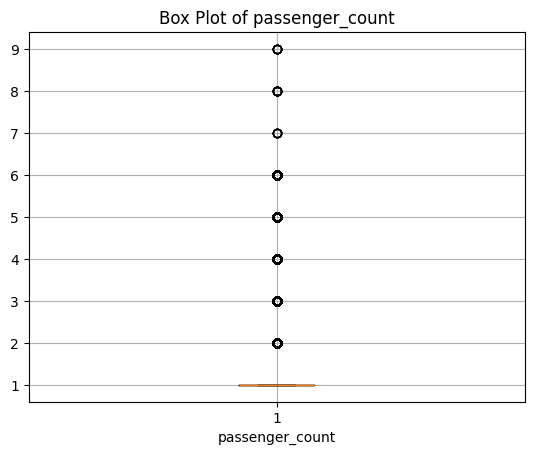

In [456]:
## We can start with columns with numerical datatypes

plt.boxplot(sample_data_new['passenger_count'])
plt.title(f'Box Plot of {'passenger_count'}')
plt.xlabel('passenger_count')
plt.grid()
plt.show()

In [457]:
Q1 = sample_data_new['passenger_count'].quantile(0.25)
Q3 = sample_data_new['passenger_count'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 *IQR
upper_limit = Q3 + 1.5 *IQR



In [458]:
sample_data_new = sample_data_new[(sample_data_new['passenger_count'] >= lower_limit) & (sample_data_new['passenger_count'] <= upper_limit)]

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [459]:
# remove passenger_count > 6
sample_data_new = sample_data_new[sample_data_new['passenger_count'] <= 6 ]


In [460]:
# Continue with outlier handling

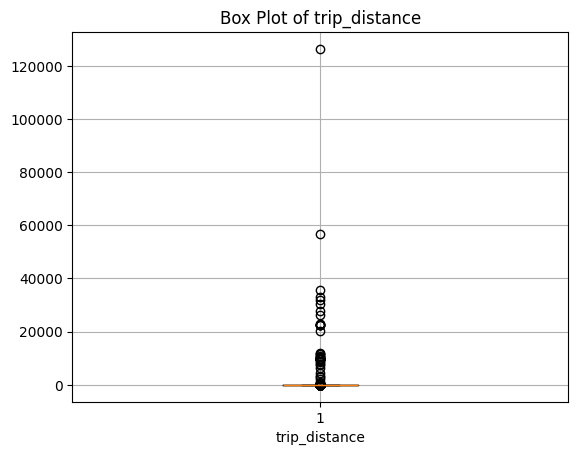

In [461]:
### Considering trip_distance for further analysis
plt.boxplot(sample_data_new['trip_distance'])
plt.title(f'Box Plot of {'trip_distance'}')
plt.xlabel('trip_distance')
plt.grid()
plt.show()

In [462]:
sample_data_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
2             1        14.90   1.00     0.50        3.98          0.00   
4             0        36.83   0.00     0.50        8.17          0.00   
5             1         6.50   3.50     0.50        2.30          0.00   
6             0        30.97   0.00     0.50        4.00          6.55   
8             0        24.51   0.00     0.50        4.28          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  \
2                   1.00         23.88                  2.50   
4                   1.00         49.00                  0.00   
5                   1.00         13.80                  2.50   
6                   1.00         43.02                  0.00   
8                   1.00         32.79                  0.00   

   Airport_fee_Total  
2               0.00  
4               0.00  
5               0.00  
6               0.00  
8               0.00

In [463]:
Q1 = sample_data_new['trip_distance'].quantile(0.25)
Q3 = sample_data_new['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 *IQR
upper_limit = Q3 + 1.5 *IQR

In [464]:
lower_limit

-2.4

In [465]:
upper_limit

6.72

In [466]:
#based on Periphery of NYC city, its highly improbable that any taxi will have a ride greater than 150km 
##(considering a chance that a taxi can go on full day rental as well, so instead of applying direct outliers, 
##removing all records having distnace greater than 150Km)

##there are reocrds with distance more than 1000km as well, we should not need them

sample_data_new = sample_data_new[sample_data_new['trip_distance'] <= 150 ]
sample_data_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
2             1        14.90   1.00     0.50        3.98          0.00   
4             0        36.83   0.00     0.50        8.17          0.00   
5             1         6.50   3.50     0.50        2.30          0.00   
6             0        30.97   0.00     0.50        4.00          6.55   
8             0        24.51   0.00     0.50        4.28          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  \
2                   1.00         23.88                  2.50   
4                   1.00         49.00                  0.00   
5                   1.00         13.80                  2.50   
6                   1.00         43.02                  0.00   
8                   1.00         32.79                  0.00   

   Airport_fee_Total  
2               0.00  
4               0.00  
5               0.00  
6               0.00  
8               0.00

In [467]:
# Do any columns need standardising?



##Yes, few columns had different data types.

##For example --tpep_pickup_datetime, tpep_dropoff_datetime were not of type as datetime, we ahd already converted them to date time formats above

##the column in the dat frame does not hold any unit value inn cells, and hence there is no need to perform unit transformation.

##There was a possibility of trip_distance being stored in meters in same column instead of km unit. However was we ahve already removed such few record, we have no such records now.


In [468]:
sample_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1471847 entries, 2 to 1896419
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1471847 non-null  int64         
 1   tpep_pickup_datetime   1471847 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1471847 non-null  datetime64[ns]
 3   passenger_count        1471847 non-null  float64       
 4   trip_distance          1471847 non-null  float64       
 5   RatecodeID             1471847 non-null  float64       
 6   store_and_fwd_flag     1471847 non-null  object        
 7   PULocationID           1471847 non-null  int64         
 8   DOLocationID           1471847 non-null  int64         
 9   payment_type           1471847 non-null  int64         
 10  fare_amount            1471847 non-null  float64       
 11  extra                  1471847 non-null  float64       
 12  mta_tax                1471847 no

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [469]:
sample_data_new.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee_Total']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.

---------------[Response provided in front of each value]-----------------------
* `VendorID`: Categorical
* `tpep_pickup_datetime`: datetime
* `tpep_dropoff_datetime`: datetime
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

-----------------[Response provided here]--->These can be termed as Numerical category.



##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [470]:
# Find and show the hourly trends in taxi pickups
sample_data_new['pickup_hour'] = sample_data_new['tpep_pickup_datetime'].dt.hour
sample_data_new.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2          2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4          2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5          1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6          2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8          2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   
9          2  2023-01-01 00:17:43   2023-01-01 01:03:15             1.00   
10         1  2023-01-01 00:53:06   2023-01-01 01:01:57             1.00   
11         2  2023-01-01 00:34:19   2023-01-01 00:46:44             1.00   
13         1  2023-01-01 00:08:49   2023-01-01 00:26:15             1.00   
14         2  2023-01-01 00:40:19   2023-01-01 01:03:17             1.00   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2            3.17        1.00                  N            79           141   
4            7.97       99.00                  N           140            17   
5            0.60        1.00                  N           237           237   
6            7.53       99.00                  N           213             7   
8            5.36       99.00                  N            88           229   
9           27.99        1.00                  N           132           158   
10           1.00        1.00                  N           261           231   
11           2.55        1.00                  N           237           239   
13           1.50        1.00                  N           170            43   
14           4.84        1.00                  N           249           236   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
2              1        14.90   1.00     0.50        3.98          0.00   
4              0        36.83   0.00     0.50        8.17          0.00   
5              1         6.50   3.50     0.50        2.30          0.00   
6              0        30.97   0.00     0.50        4.00          6.55   
8              0        24.51   0.00     0.50        4.28          0.00   
9              2       105.90   1.00     0.50        0.00          6.55   
10             4         8.60   3.50     0.50        0.00          0.00   
11             1        14.90   1.00     0.50        1.50          0.00   
13             2        16.30   3.50     0.50        0.00          0.00   
14             1        25.40   1.00     0.50        6.08          0.00   

    improvement_surcharge  total_amount  congestion_surcharge  \
2                    1.00         23.88                  2.50   
4                    1.00         49.00                  0.00   
5                    1.00         13.80                  2.50   
6                    1.00         43.02                  0.00   
8                    1.00         32.79                  0.00   
9                    1.00        118.70                  2.50   
10                   1.00         13.60                  2.50   
11                   1.00         21.40                  2.50   
13                   1.00         21.30                  2.50   
14                   1.00         36.48                  2.50   

    Airport_fee_Total  pickup_hour  
2                0.00            0  
4                0.00            0  
5                0.00            0  
6                0.00            0  
8                0.00            0  
9                1.25            0  
10               0.00            0  
11               0.00            0  
13               0.00            0  
14               0.00            0

In [471]:
hourly_counts = sample_data_new.groupby('pickup_hour').size()

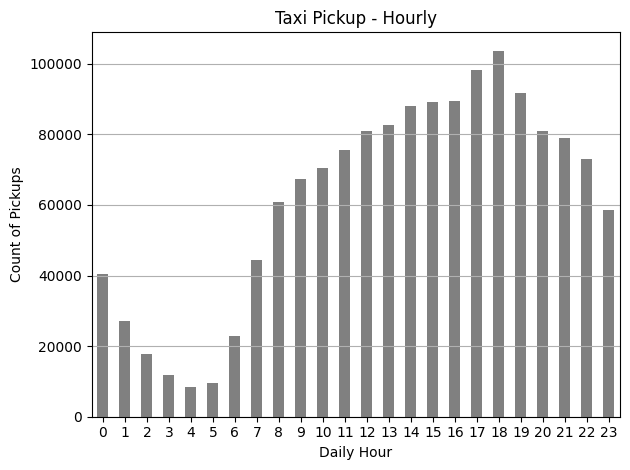

In [472]:
hourly_counts.plot(kind='bar', color='grey')
plt.title('Taxi Pickup - Hourly')
plt.xlabel('Daily Hour')
plt.ylabel('Count of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [473]:
##Obervation:

##Based on above graph, its clear that the pickup trend is weak at early morning, and starts to increase gradually during early offic hours from 9am, 
## The overall trend is stable at high, during daylight, and peaks consistent mostly during from near to post office hours.
## The peak is at around 6pm everyday, and gradually reduces overnight until dawn.

In [474]:
# Find and show the daily trends in taxi pickups (days of the week)
sample_data_new['day_of_week'] = sample_data_new['tpep_pickup_datetime'].dt.dayofweek
sample_data_new.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2          2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4          2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5          1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6          2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8          2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   
9          2  2023-01-01 00:17:43   2023-01-01 01:03:15             1.00   
10         1  2023-01-01 00:53:06   2023-01-01 01:01:57             1.00   
11         2  2023-01-01 00:34:19   2023-01-01 00:46:44             1.00   
13         1  2023-01-01 00:08:49   2023-01-01 00:26:15             1.00   
14         2  2023-01-01 00:40:19   2023-01-01 01:03:17             1.00   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2            3.17        1.00                  N            79           141   
4            7.97       99.00                  N           140            17   
5            0.60        1.00                  N           237           237   
6            7.53       99.00                  N           213             7   
8            5.36       99.00                  N            88           229   
9           27.99        1.00                  N           132           158   
10           1.00        1.00                  N           261           231   
11           2.55        1.00                  N           237           239   
13           1.50        1.00                  N           170            43   
14           4.84        1.00                  N           249           236   

    payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
2              1  ...   1.00     0.50        3.98          0.00   
4              0  ...   0.00     0.50        8.17          0.00   
5              1  ...   3.50     0.50        2.30          0.00   
6              0  ...   0.00     0.50        4.00          6.55   
8              0  ...   0.00     0.50        4.28          0.00   
9              2  ...   1.00     0.50        0.00          6.55   
10             4  ...   3.50     0.50        0.00          0.00   
11             1  ...   1.00     0.50        1.50          0.00   
13             2  ...   3.50     0.50        0.00          0.00   
14             1  ...   1.00     0.50        6.08          0.00   

    improvement_surcharge  total_amount  congestion_surcharge  \
2                    1.00         23.88                  2.50   
4                    1.00         49.00                  0.00   
5                    1.00         13.80                  2.50   
6                    1.00         43.02                  0.00   
8                    1.00         32.79                  0.00   
9                    1.00        118.70                  2.50   
10                   1.00         13.60                  2.50   
11                   1.00         21.40                  2.50   
13                   1.00         21.30                  2.50   
14                   1.00         36.48                  2.50   

    Airport_fee_Total  pickup_hour  day_of_week  
2                0.00            0            6  
4                0.00            0            6  
5                0.00            0            6  
6                0.00            0            6  
8                0.00            0            6  
9                1.25            0            6  
10               0.00            0            6  
11               0.00            0            6  
13               0.00            0            6  
14               0.00            0            6  

[10 rows x 21 columns]

In [475]:
mapDict = {0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
sample_data_new['day_name'] = sample_data_new['day_of_week'].map(mapDict)
sample_data_new.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2          2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4          2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5          1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6          2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8          2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   
9          2  2023-01-01 00:17:43   2023-01-01 01:03:15             1.00   
10         1  2023-01-01 00:53:06   2023-01-01 01:01:57             1.00   
11         2  2023-01-01 00:34:19   2023-01-01 00:46:44             1.00   
13         1  2023-01-01 00:08:49   2023-01-01 00:26:15             1.00   
14         2  2023-01-01 00:40:19   2023-01-01 01:03:17             1.00   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2            3.17        1.00                  N            79           141   
4            7.97       99.00                  N           140            17   
5            0.60        1.00                  N           237           237   
6            7.53       99.00                  N           213             7   
8            5.36       99.00                  N            88           229   
9           27.99        1.00                  N           132           158   
10           1.00        1.00                  N           261           231   
11           2.55        1.00                  N           237           239   
13           1.50        1.00                  N           170            43   
14           4.84        1.00                  N           249           236   

    payment_type  ...  mta_tax  tip_amount  tolls_amount  \
2              1  ...     0.50        3.98          0.00   
4              0  ...     0.50        8.17          0.00   
5              1  ...     0.50        2.30          0.00   
6              0  ...     0.50        4.00          6.55   
8              0  ...     0.50        4.28          0.00   
9              2  ...     0.50        0.00          6.55   
10             4  ...     0.50        0.00          0.00   
11             1  ...     0.50        1.50          0.00   
13             2  ...     0.50        0.00          0.00   
14             1  ...     0.50        6.08          0.00   

    improvement_surcharge  total_amount  congestion_surcharge  \
2                    1.00         23.88                  2.50   
4                    1.00         49.00                  0.00   
5                    1.00         13.80                  2.50   
6                    1.00         43.02                  0.00   
8                    1.00         32.79                  0.00   
9                    1.00        118.70                  2.50   
10                   1.00         13.60                  2.50   
11                   1.00         21.40                  2.50   
13                   1.00         21.30                  2.50   
14                   1.00         36.48                  2.50   

    Airport_fee_Total  pickup_hour  day_of_week  day_name  
2                0.00            0            6    Sunday  
4                0.00            0            6    Sunday  
5                0.00            0            6    Sunday  
6                0.00            0            6    Sunday  
8                0.00            0            6    Sunday  
9                1.25            0            6    Sunday  
10               0.00            0            6    Sunday  
11               0.00            0            6    Sunday  
13               0.00            0            6    Sunday  
14               0.00            0            6    Sunday  

[10 rows x 22 columns]

In [476]:
pickups_DayWise = sample_data_new['day_name'].value_counts().reindex(mapDict.values())
pickups_DayWise

day_name
Monday       186665
Tuesday      221683
Wednesday    235363
Thursday     238388
Friday       216661
Saturday     198109
Sunday       174978
Name: count, dtype: int64

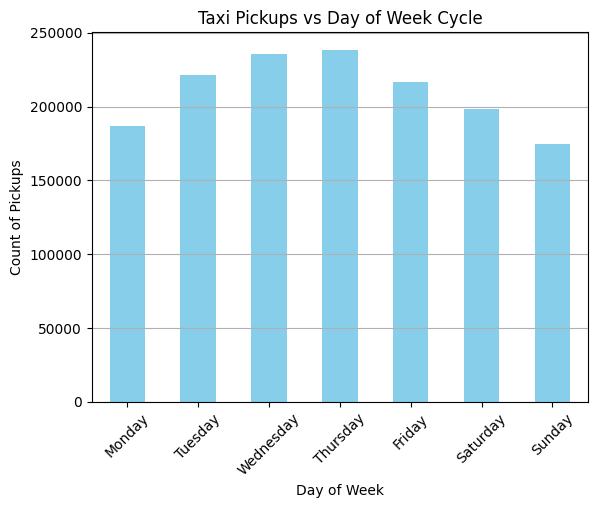

In [477]:
pickups_DayWise.plot(kind='bar', color='skyblue')
plt.title('Taxi Pickups vs Day of Week Cycle')
plt.xlabel('Day of Week')
plt.ylabel('Count of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [478]:
##Obervation:

## The trend clearly shows that the demand for taxis is low at start and end of the week. 
## This probably might be due to presence of weekend days where majority of population might not chose to travel

## Similarly the demand in the middle of the week is very strong, as probably by mid week, most of ppl are into travel mode , mostly for office work.

In [479]:
# Show the monthly trends in pickups

sample_data_new['pickup_month'] = sample_data_new['tpep_pickup_datetime'].dt.to_period('M')

In [480]:
sample_data_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
2             1  ...        3.98          0.00                   1.00   
4             0  ...        8.17          0.00                   1.00   
5             1  ...        2.30          0.00                   1.00   
6             0  ...        4.00          6.55                   1.00   
8             0  ...        4.28          0.00                   1.00   

   total_amount  congestion_surcharge  Airport_fee_Total  pickup_hour  \
2         23.88                  2.50               0.00            0   
4         49.00                  0.00               0.00            0   
5         13.80                  2.50               0.00            0   
6         43.02                  0.00               0.00            0   
8         32.79                  0.00               0.00            0   

   day_of_week  day_name  pickup_month  
2            6    Sunday       2023-01  
4            6    Sunday       2023-01  
5            6    Sunday       2023-01  
6            6    Sunday       2023-01  
8            6    Sunday       2023-01  

[5 rows x 23 columns]

In [481]:
pickup_Monthly = sample_data_new['pickup_month'].value_counts().sort_index()
pickup_Monthly

pickup_month
2001-01         1
2002-12         1
2008-12         1
2009-01         1
2022-12         2
2023-01    118201
2023-02    113373
2023-03    132667
2023-04    125283
2023-05    135606
2023-06    126993
2023-07    109298
2023-08    107416
2023-09    110424
2023-10    136529
2023-11    129309
2023-12    126741
2024-01         1
Freq: M, Name: count, dtype: int64

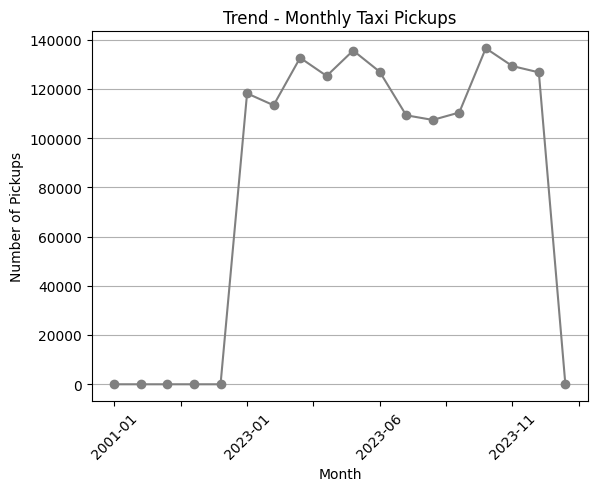

In [482]:
pickup_Monthly.index = pickup_Monthly.index.astype(str)

pickup_Monthly.plot(kind='line', marker='o', color='grey')
plt.title('Trend - Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [483]:
##Observations

##The monthly trend shows increase during first half of year, followed by a gradual U shaped dip, suggesting recovery rise again
##in the last quarter of the year.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [484]:
# Analyse the above parameters
print ( 'Count of zeroes in fare_amount --> '  , sample_data_new[sample_data_new['fare_amount'] == 0 ].shape[0] )
print ( 'Count of zeroes in tip_amount --> '  , sample_data_new[sample_data_new['tip_amount'] == 0 ].shape[0] )
print ( 'Count of zeroes in total_amount --> '  , sample_data_new[sample_data_new['total_amount'] == 0 ].shape[0] )
print ( 'Count of zeroes in trip_distance --> '  , sample_data_new[sample_data_new['trip_distance'] == 0 ].shape[0] )
print('')
print ( 'Count of negative in fare_amount --> '  , sample_data_new[sample_data_new['fare_amount'] < 0 ].shape[0] )
print ( 'Count of negative in tip_amount --> '  , sample_data_new[sample_data_new['tip_amount'] < 0 ].shape[0] )
print ( 'Count of negative in total_amount --> '  , sample_data_new[sample_data_new['total_amount'] < 0 ].shape[0] )
print ( 'Count of negative in trip_distance --> '  , sample_data_new[sample_data_new['trip_distance'] < 0 ].shape[0] )

##Negative values had all be hadled during data clear stage


Count of zeroes in fare_amount -->  576
Count of zeroes in tip_amount -->  330238
Count of zeroes in total_amount -->  354
Count of zeroes in trip_distance -->  33249

Count of negative in fare_amount -->  0
Count of negative in tip_amount -->  0
Count of negative in total_amount -->  0
Count of negative in trip_distance -->  0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [485]:
## Yes. 
## It can be termed as beneficial create a filtered copy of the DataFrame excluding zero.
##possible reasons can be that zeroes can represent errros in data entry, cancelled trips, etc.
##including them can skew results like affects mean, stat figures etc and that can lead to bias creeping into the ML models.

##One instance where it can be exception and can be used is when the problem statement is to detect frauds.



**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [486]:
# Create a df with non zero entries for the selected parameters.
fare_amount_AboveZero = sample_data_new[sample_data_new['fare_amount'] > 0].copy()
tip_amount_AboveZero = sample_data_new[sample_data_new['tip_amount'] > 0].copy()
total_amount_AboveZero = sample_data_new[sample_data_new['total_amount'] > 0].copy()
trip_distance_AboveZero = sample_data_new[sample_data_new['trip_distance'] > 0].copy()


In [487]:
fare_amount_AboveZero.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
2             1  ...        3.98          0.00                   1.00   
4             0  ...        8.17          0.00                   1.00   
5             1  ...        2.30          0.00                   1.00   
6             0  ...        4.00          6.55                   1.00   
8             0  ...        4.28          0.00                   1.00   

   total_amount  congestion_surcharge  Airport_fee_Total  pickup_hour  \
2         23.88                  2.50               0.00            0   
4         49.00                  0.00               0.00            0   
5         13.80                  2.50               0.00            0   
6         43.02                  0.00               0.00            0   
8         32.79                  0.00               0.00            0   

   day_of_week  day_name  pickup_month  
2            6    Sunday       2023-01  
4            6    Sunday       2023-01  
5            6    Sunday       2023-01  
6            6    Sunday       2023-01  
8            6    Sunday       2023-01  

[5 rows x 23 columns]

In [488]:
tip_amount_AboveZero.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
2             1  ...        3.98          0.00                   1.00   
4             0  ...        8.17          0.00                   1.00   
5             1  ...        2.30          0.00                   1.00   
6             0  ...        4.00          6.55                   1.00   
8             0  ...        4.28          0.00                   1.00   

   total_amount  congestion_surcharge  Airport_fee_Total  pickup_hour  \
2         23.88                  2.50               0.00            0   
4         49.00                  0.00               0.00            0   
5         13.80                  2.50               0.00            0   
6         43.02                  0.00               0.00            0   
8         32.79                  0.00               0.00            0   

   day_of_week  day_name  pickup_month  
2            6    Sunday       2023-01  
4            6    Sunday       2023-01  
5            6    Sunday       2023-01  
6            6    Sunday       2023-01  
8            6    Sunday       2023-01  

[5 rows x 23 columns]

In [489]:
total_amount_AboveZero.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
2             1  ...        3.98          0.00                   1.00   
4             0  ...        8.17          0.00                   1.00   
5             1  ...        2.30          0.00                   1.00   
6             0  ...        4.00          6.55                   1.00   
8             0  ...        4.28          0.00                   1.00   

   total_amount  congestion_surcharge  Airport_fee_Total  pickup_hour  \
2         23.88                  2.50               0.00            0   
4         49.00                  0.00               0.00            0   
5         13.80                  2.50               0.00            0   
6         43.02                  0.00               0.00            0   
8         32.79                  0.00               0.00            0   

   day_of_week  day_name  pickup_month  
2            6    Sunday       2023-01  
4            6    Sunday       2023-01  
5            6    Sunday       2023-01  
6            6    Sunday       2023-01  
8            6    Sunday       2023-01  

[5 rows x 23 columns]

In [490]:
trip_distance_AboveZero.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
2             1  ...        3.98          0.00                   1.00   
4             0  ...        8.17          0.00                   1.00   
5             1  ...        2.30          0.00                   1.00   
6             0  ...        4.00          6.55                   1.00   
8             0  ...        4.28          0.00                   1.00   

   total_amount  congestion_surcharge  Airport_fee_Total  pickup_hour  \
2         23.88                  2.50               0.00            0   
4         49.00                  0.00               0.00            0   
5         13.80                  2.50               0.00            0   
6         43.02                  0.00               0.00            0   
8         32.79                  0.00               0.00            0   

   day_of_week  day_name  pickup_month  
2            6    Sunday       2023-01  
4            6    Sunday       2023-01  
5            6    Sunday       2023-01  
6            6    Sunday       2023-01  
8            6    Sunday       2023-01  

[5 rows x 23 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [491]:
# Group data by month and analyse monthly revenue

monthlyTotdalRevenue = sample_data_new.groupby('pickup_month')['total_amount'].sum()


In [492]:
monthlyTotdalRevenue.index = monthlyTotdalRevenue.index.astype(str)

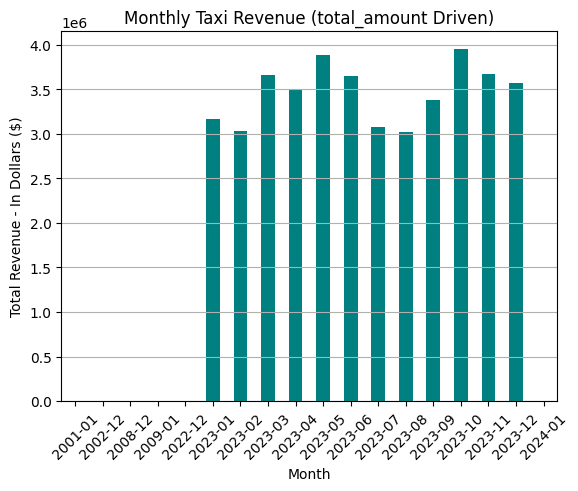

In [493]:
monthlyTotdalRevenue.plot(kind='bar', color='teal')
plt.title('Monthly Taxi Revenue (total_amount Driven)')
plt.xlabel('Month')
plt.ylabel('Total Revenue - In Dollars ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [494]:
#observations: 
##The above trend shows that the monthly revenue is in resonance with the monthly trend for taxi demand or taxi pickups.
##The trend follows a sinusidal curve where at first its more, reducing at mid of year, and gradually retaining its peak at last quarter.


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [495]:
# Calculate proportion of each quarter

sample_data_new['quarter'] = sample_data_new['tpep_pickup_datetime'].dt.to_period('Q')
sample_data_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
2             1  ...          0.00                   1.00         23.88   
4             0  ...          0.00                   1.00         49.00   
5             1  ...          0.00                   1.00         13.80   
6             0  ...          6.55                   1.00         43.02   
8             0  ...          0.00                   1.00         32.79   

   congestion_surcharge  Airport_fee_Total  pickup_hour  day_of_week  \
2                  2.50               0.00            0            6   
4                  0.00               0.00            0            6   
5                  2.50               0.00            0            6   
6                  0.00               0.00            0            6   
8                  0.00               0.00            0            6   

   day_name  pickup_month  quarter  
2    Sunday       2023-01   2023Q1  
4    Sunday       2023-01   2023Q1  
5    Sunday       2023-01   2023Q1  
6    Sunday       2023-01   2023Q1  
8    Sunday       2023-01   2023Q1  

[5 rows x 24 columns]

In [496]:
revenue_Quarter = sample_data_new.groupby('quarter')['total_amount'].sum()
revenue_Quarter.head()

quarter
2001Q1   98.76
2002Q4   21.00
2008Q4   16.25
2009Q1   14.00
2022Q4   37.10
Freq: Q-DEC, Name: total_amount, dtype: float64

In [497]:
proportionPerQuarter=(revenue_Quarter/revenue_Quarter.sum())*100
proportionPerQuarter

quarter
2001Q1    0.00
2002Q4    0.00
2008Q4    0.00
2009Q1    0.00
2022Q4    0.00
2023Q1   23.74
2023Q2   26.53
2023Q3   22.79
2023Q4   26.94
2024Q1    0.00
Freq: Q-DEC, Name: total_amount, dtype: float64

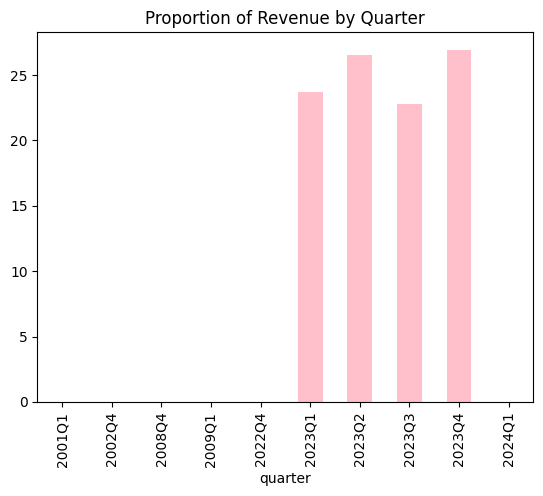

In [498]:
proportionPerQuarter.plot(kind='bar', color='pink')
plt.title('Proportion of Revenue by Quarter')
plt.ylabel('') 
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [499]:
# Show how trip fare is affected by distance
validtrips = sample_data_new[sample_data_new['trip_distance'] > 0 ]
#validtrips['fare_amount'].max()

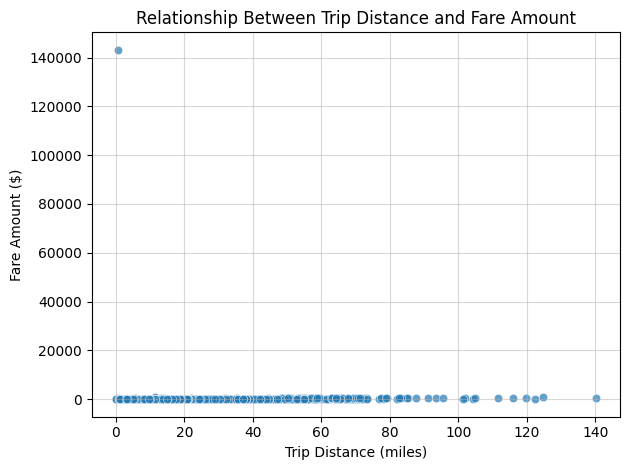

In [500]:
sns.scatterplot(data=validtrips, x='trip_distance', y='fare_amount', alpha=0.7)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [501]:
####The above graph looks to be incorrect, as the outlier is too evident above. We can try removing the obvious outlier and retry plotting.

In [502]:
validtrips = sample_data_new[sample_data_new['trip_distance'] > 0 ]
validtrips =  validtrips [validtrips['fare_amount'] <120000]
validtrips['fare_amount'].max()

786.3

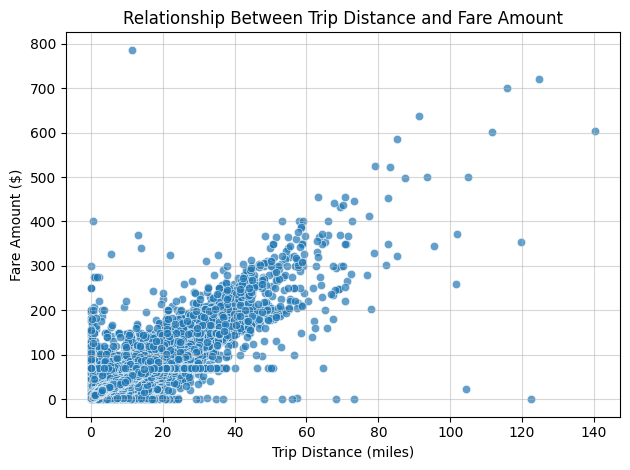

In [503]:
sns.scatterplot(data=validtrips, x='trip_distance', y='fare_amount', alpha=0.7)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [504]:
correlation = validtrips['trip_distance'].corr(validtrips['fare_amount'])
correlation

0.942215041925503

In [505]:
## The correlation coefficient between trip_distance and fare_amount is almost 94%. This suggests a very strong positive correlation between both factors. 
## As they seem proportional to each other, in a very strong way.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [506]:
##Calculate duration in minutes
sample_data_new['trip_duration']=(sample_data_new['tpep_dropoff_datetime']-sample_data_new['tpep_pickup_datetime']).dt.total_seconds()/60
sample_data_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  improvement_surcharge  total_amount  \
2             1  ...                   1.00         23.88   
4             0  ...                   1.00         49.00   
5             1  ...                   1.00         13.80   
6             0  ...                   1.00         43.02   
8             0  ...                   1.00         32.79   

   congestion_surcharge  Airport_fee_Total  pickup_hour  day_of_week  \
2                  2.50               0.00            0            6   
4                  0.00               0.00            0            6   
5                  2.50               0.00            0            6   
6                  0.00               0.00            0            6   
8                  0.00               0.00            0            6   

   day_name  pickup_month  quarter  trip_duration  
2    Sunday       2023-01   2023Q1           9.25  
4    Sunday       2023-01   2023Q1          24.00  
5    Sunday       2023-01   2023Q1           4.92  
6    Sunday       2023-01   2023Q1          14.65  
8    Sunday       2023-01   2023Q1          12.42  

[5 rows x 25 columns]

In [507]:
targetdata = sample_data_new[
    (sample_data_new['trip_duration'] > 0) &
    (sample_data_new['trip_distance'] > 0) &
    (sample_data_new['fare_amount'] <120000) & ## taking care of one outlier
    (sample_data_new['trip_duration'] < 2000) 
]
targetdata.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  improvement_surcharge  total_amount  \
2             1  ...                   1.00         23.88   
4             0  ...                   1.00         49.00   
5             1  ...                   1.00         13.80   
6             0  ...                   1.00         43.02   
8             0  ...                   1.00         32.79   

   congestion_surcharge  Airport_fee_Total  pickup_hour  day_of_week  \
2                  2.50               0.00            0            6   
4                  0.00               0.00            0            6   
5                  2.50               0.00            0            6   
6                  0.00               0.00            0            6   
8                  0.00               0.00            0            6   

   day_name  pickup_month  quarter  trip_duration  
2    Sunday       2023-01   2023Q1           9.25  
4    Sunday       2023-01   2023Q1          24.00  
5    Sunday       2023-01   2023Q1           4.92  
6    Sunday       2023-01   2023Q1          14.65  
8    Sunday       2023-01   2023Q1          12.42  

[5 rows x 25 columns]

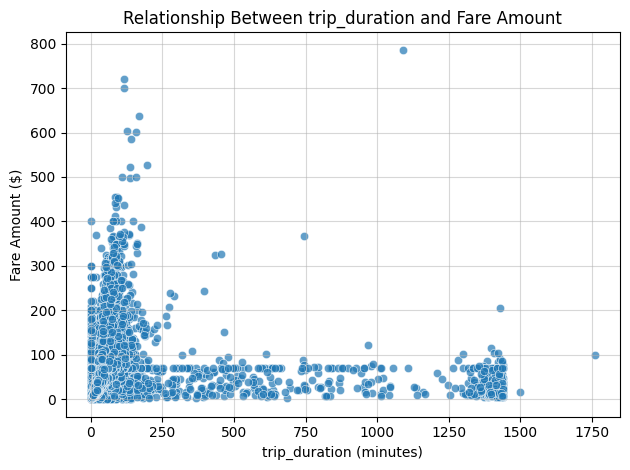

In [508]:
sns.scatterplot(data=targetdata, x='trip_duration', y='fare_amount', alpha=0.7)
plt.title('Relationship Between trip_duration and Fare Amount')
plt.xlabel('trip_duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [509]:
correlation = targetdata['trip_duration'].corr(targetdata['fare_amount'])
correlation

0.29469795386382586

In [510]:
##Observation:

## There is a weak correlation between --trip_duration and fare_amount

##Longer trip duration dont always mean high fare.
##Possible reasons can be traffic or longer waiting durations.


In [511]:
# Show relationship between fare and number of passengers

targetdata = sample_data_new[
    (sample_data_new['trip_duration'] > 0) &
    (sample_data_new['trip_distance'] > 0) &
    (sample_data_new['fare_amount'] <120000) & ## taking care of one outlier
    (sample_data_new['trip_duration'] < 2000) ## taking care of one outlier
]
targetdata.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  improvement_surcharge  total_amount  \
2             1  ...                   1.00         23.88   
4             0  ...                   1.00         49.00   
5             1  ...                   1.00         13.80   
6             0  ...                   1.00         43.02   
8             0  ...                   1.00         32.79   

   congestion_surcharge  Airport_fee_Total  pickup_hour  day_of_week  \
2                  2.50               0.00            0            6   
4                  0.00               0.00            0            6   
5                  2.50               0.00            0            6   
6                  0.00               0.00            0            6   
8                  0.00               0.00            0            6   

   day_name  pickup_month  quarter  trip_duration  
2    Sunday       2023-01   2023Q1           9.25  
4    Sunday       2023-01   2023Q1          24.00  
5    Sunday       2023-01   2023Q1           4.92  
6    Sunday       2023-01   2023Q1          14.65  
8    Sunday       2023-01   2023Q1          12.42  

[5 rows x 25 columns]

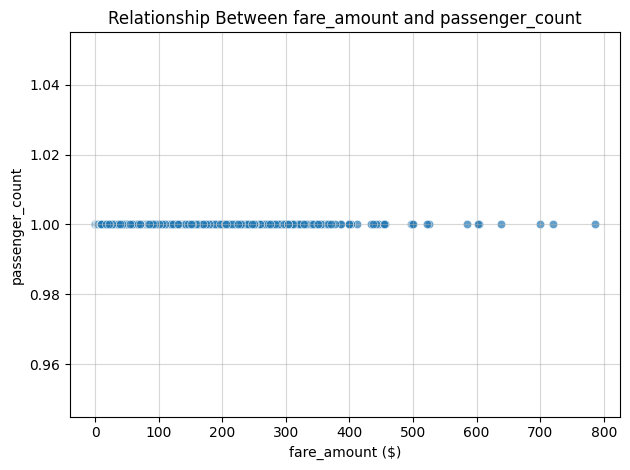

In [512]:
sns.scatterplot(data=targetdata, x='fare_amount', y='passenger_count', alpha=0.7)
plt.title('Relationship Between fare_amount and passenger_count')
plt.xlabel('fare_amount ($)')
plt.ylabel('passenger_count')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [513]:
correlation = targetdata['passenger_count'].corr(targetdata['fare_amount'])
correlation

F:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
F:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


nan

In [514]:
## Observation:

##There is no correlation between number of passengers vs thefare amount.

In [515]:
# Show relationship between tip and trip distance

targetdata = sample_data_new[
    (sample_data_new['trip_duration'] > 0) &
    (sample_data_new['trip_distance'] > 0) &
    (sample_data_new['fare_amount'] <120000) & ## taking care of one outlier
    (sample_data_new['trip_duration'] < 2000) 
]
targetdata.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  improvement_surcharge  total_amount  \
2             1  ...                   1.00         23.88   
4             0  ...                   1.00         49.00   
5             1  ...                   1.00         13.80   
6             0  ...                   1.00         43.02   
8             0  ...                   1.00         32.79   

   congestion_surcharge  Airport_fee_Total  pickup_hour  day_of_week  \
2                  2.50               0.00            0            6   
4                  0.00               0.00            0            6   
5                  2.50               0.00            0            6   
6                  0.00               0.00            0            6   
8                  0.00               0.00            0            6   

   day_name  pickup_month  quarter  trip_duration  
2    Sunday       2023-01   2023Q1           9.25  
4    Sunday       2023-01   2023Q1          24.00  
5    Sunday       2023-01   2023Q1           4.92  
6    Sunday       2023-01   2023Q1          14.65  
8    Sunday       2023-01   2023Q1          12.42  

[5 rows x 25 columns]

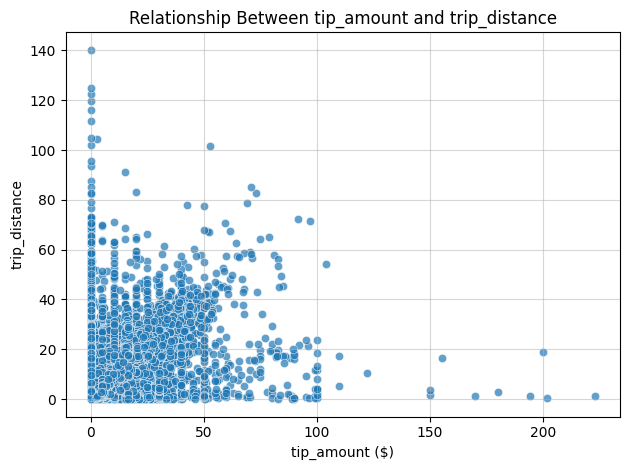

In [516]:
sns.scatterplot(data=targetdata, x='tip_amount', y='trip_distance', alpha=0.7)
plt.title('Relationship Between tip_amount and trip_distance')
plt.xlabel('tip_amount ($)')
plt.ylabel('trip_distance')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [517]:
correlation = targetdata['tip_amount'].corr(targetdata['trip_distance'])
correlation

0.5915892595154909

In [ ]:
##Observatio: 

##There seems to be mildly strong positive correlation between tip_amount vs trip_distance , although not a very strong correlation

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [518]:
# Analyse the distribution of different payment types (payment_type)

payment_counts = sample_data_new['payment_type'].value_counts()
payment_counts

payment_type
1    1157772
2     231113
0      64848
4      10713
3       7401
Name: count, dtype: int64

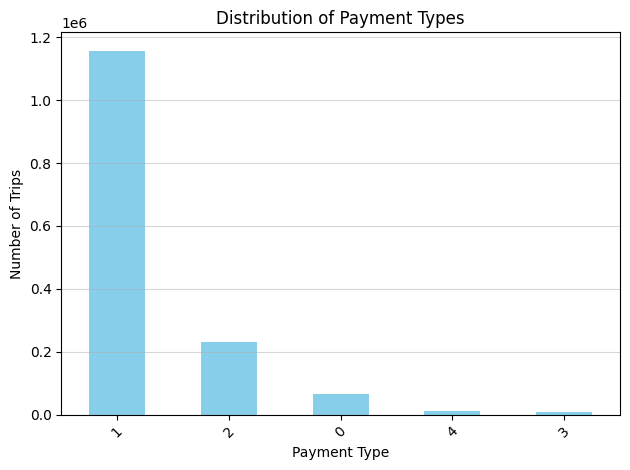

In [520]:
payment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:
##observations:

From distribution, its evident that the the payment type of 1 has the highest occurences.
Payment Type 1 --> Creditcard (from data dictionary)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [522]:
# !pip install geopandas
!pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ---------- ----------------------------- 5.0/19.2 MB 23.2 MB/s eta 0:00:01
   ---------------------- ----------------- 10.7/19.2 MB 24.9 MB/s eta 0:00:01
   ------------------------- -------------- 12.3/19.2 MB 18.8 MB/s eta 0:00:01
   ---------------------------- ----------- 13.6/19.2 MB 15.9 MB/s eta 0:00:01
   --------------------------------- ------ 16.0/19.2 MB 14.8 MB/s eta 0:00:01
   ------------------------------------- -- 17.8/19.2 MB 15.0 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 12.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------- -------------------------- 2.1/6.3 MB 14.7 MB/s eta 0:00:01
   -------------------- ------------------- 3.1/6.3 MB 6.8 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.3 MB 10.2 MB/s eta 0:00:01


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [527]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gdf = gpd.read_file(r'C:\Users\Shanks\Downloads\EDA NYC assignment\Starter Notebook - EDA NYC Taxi\Datasets and Dictionary\taxi_zones\taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1        0.12        0.00           Newark Airport           1   
1         2        0.43        0.00              Jamaica Bay           2   
2         3        0.08        0.00  Allerton/Pelham Gardens           3   
3         4        0.04        0.00            Alphabet City           4   
4         5        0.09        0.00            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [528]:
# print(zones.info())
print(zones.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

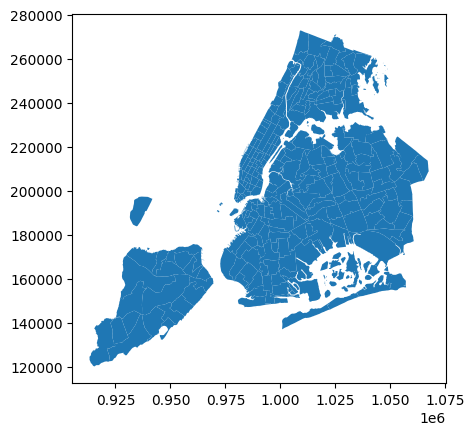

In [529]:
# zones.plot()
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [532]:
# Merge zones and trip records using locationID and PULocationID

trip_with_pickup_zone_join =pd.merge(
    sample_data_new,
    zones,
    how='left',
    left_on='PULocationID',
    right_on='LocationID'  # or 'location_id' depending on file
)
trip_with_pickup_zone_join.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
1         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
2         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
3         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
4         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.17        1.00                  N            79           141   
1           7.97       99.00                  N           140            17   
2           0.60        1.00                  N           237           237   
3           7.53       99.00                  N           213             7   
4           5.36       99.00                  N            88           229   

   payment_type  ...  pickup_month  quarter  trip_duration  OBJECTID  \
0             1  ...       2023-01   2023Q1           9.25     79.00   
1             0  ...       2023-01   2023Q1          24.00    140.00   
2             1  ...       2023-01   2023Q1           4.92    237.00   
3             0  ...       2023-01   2023Q1          14.65    213.00   
4             0  ...       2023-01   2023Q1          12.42     88.00   

   Shape_Leng  Shape_Area                      zone  LocationID    borough  \
0        0.04        0.00              East Village       79.00  Manhattan   
1        0.05        0.00           Lenox Hill East      140.00  Manhattan   
2        0.04        0.00     Upper East Side South      237.00  Manhattan   
3        0.16        0.00     Soundview/Castle Hill      213.00      Bronx   
4        0.04        0.00  Financial District South       88.00  Manhattan   

                                            geometry  
0  POLYGON ((988746.067 202151.955, 988733.885 20...  
1  POLYGON ((995735.062 215619.835, 995670.105 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  MULTIPOLYGON (((1029456.001 237188.918, 102937...  
4  POLYGON ((981547.706 196045.255, 981628.588 19...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [534]:
# Group data by location and calculate the number of trips
pickup_counts = sample_data_new.groupby('PULocationID').size().reset_index(name='trip_count')
pickup_counts


PULocationID  trip_count
0               1         138
1               2           2
2               3          42
3               4        1874
4               5          13
..            ...         ...
253           261        7064
254           262       20830
255           263       29262
256           264       13790
257           265        1174

[258 rows x 2 columns]

In [535]:
pickup_counts =pickup_counts.sort_values(by='trip_count',ascending=False)
pickup_counts

PULocationID  trip_count
229           237       70821
154           161       67423
125           132       65663
228           236       63941
155           162       53851
..            ...         ...
191           199           1
104           111           1
108           115           1
237           245           1
165           172           1

[258 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [540]:
# Merge trip counts back to the zones GeoDataFrame
zones_withcount=zones.merge(pickup_counts, how='left',left_on='LocationID',right_on='PULocationID')
##zones_withcount['trip_count'] = zones_withcount['trip_count'].fillna(0)
zones_withcount.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1        0.12        0.00           Newark Airport           1   
1         2        0.43        0.00              Jamaica Bay           2   
2         3        0.08        0.00  Allerton/Pelham Gardens           3   
3         4        0.04        0.00            Alphabet City           4   
4         5        0.09        0.00            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  trip_count  
0          1.00      138.00  
1          2.00        2.00  
2          3.00       42.00  
3          4.00     1874.00  
4          5.00       13.00

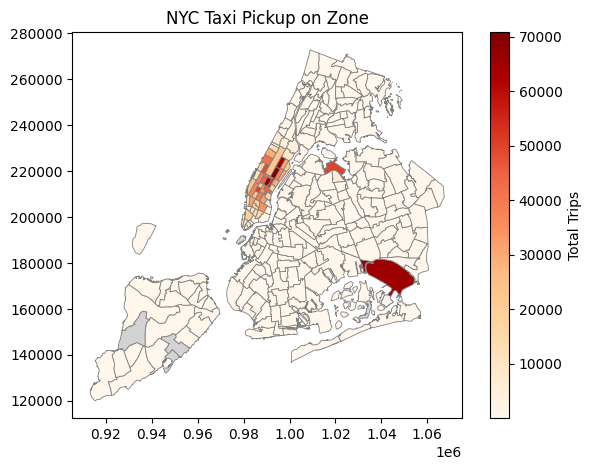

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

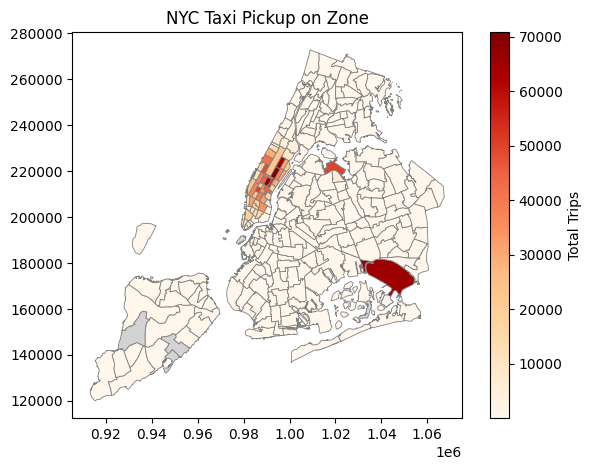

In [547]:
#fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones_withcount.plot(column='trip_count', 
cmap='OrRd', 
linewidth=0.6, 
edgecolor='gray', 
legend=True,
legend_kwds={'label':"Total Trips"},
missing_kwds={"color":"lightgrey", "label": "No Data"})
plt.title("NYC Taxi Pickup on Zone")
plt.tight_layout()
plt.show()

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

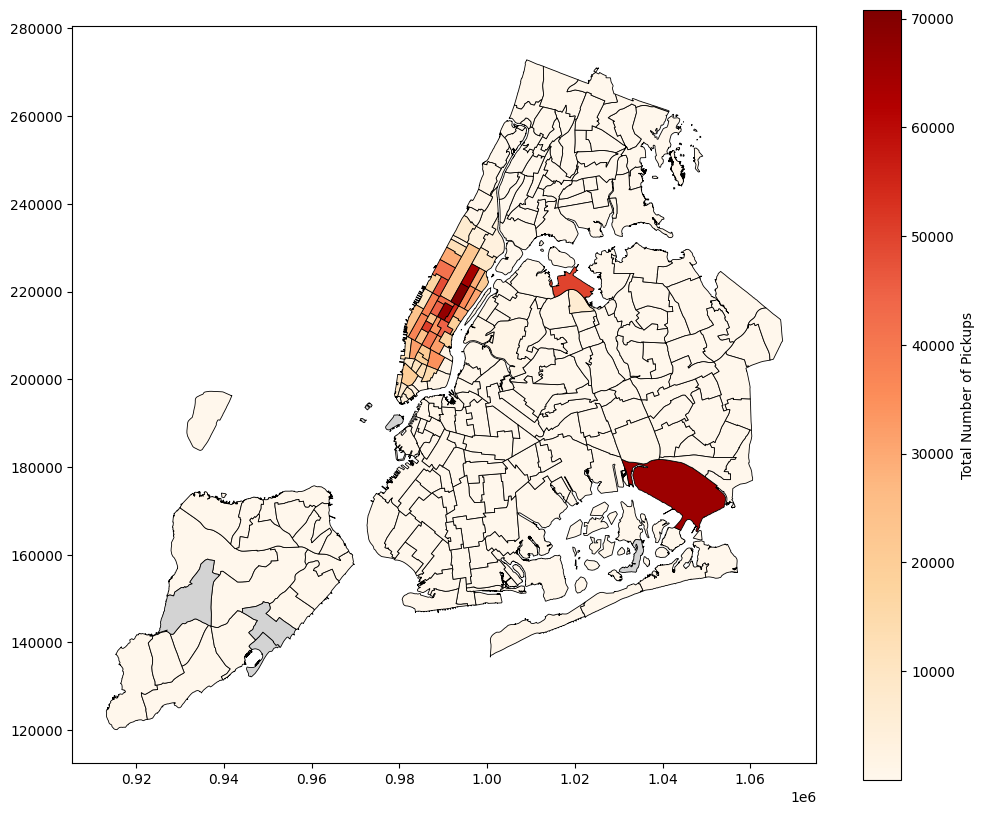

In [551]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


# Plot the map and display it

zones_withcount.plot(
column='trip_count',
ax=ax,
legend=True,
cmap='OrRd',
edgecolor='black',
linewidth=0.6,
legend_kwds={ 'label': "Total Number of Pickups",
 'orientation': "vertical"
},
    missing_kwds={ "color": "lightgrey",
        "label": "No Data"
    }
)


In [553]:
zones_withcount

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1        0.12        0.00           Newark Airport           1   
1           2        0.43        0.00              Jamaica Bay           2   
2           3        0.08        0.00  Allerton/Pelham Gardens           3   
3           4        0.04        0.00            Alphabet City           4   
4           5        0.09        0.00            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259        0.13        0.00       Woodlawn/Wakefield         259   
259       260        0.13        0.00                 Woodside         260   
260       261        0.03        0.00       World Trade Center         261   
261       262        0.05        0.00           Yorkville East         262   
262       263        0.04        0.00           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     PULocationID  trip_count  
0            1.00      138.00  
1            2.00        2.00  
2            3.00       42.00  
3            4.00     1874.00  
4            5.00       13.00  
..            ...         ...  
258        259.00       50.00  
259        260.00      303.00  
260        261.00     7064.00  
261        262.00    20830.00  
262        263.00    29262.00  

[263 rows x 9 columns]

In [555]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones_withcount.sort_values(by='trip_count',ascending=False)

# Display the top 10 zones with most trips
sorted_zones.head(10)


OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237        0.04        0.00         Upper East Side South   
160       161        0.04        0.00                Midtown Center   
131       132        0.25        0.00                   JFK Airport   
235       236        0.04        0.00         Upper East Side North   
161       162        0.04        0.00                  Midtown East   
185       186        0.02        0.00  Penn Station/Madison Sq West   
137       138        0.11        0.00             LaGuardia Airport   
141       142        0.04        0.00           Lincoln Square East   
169       170        0.05        0.00                   Murray Hill   
229       230        0.03        0.00     Times Sq/Theatre District   

     LocationID    borough                                           geometry  \
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   

     PULocationID  trip_count  
236        237.00    70821.00  
160        161.00    67423.00  
131        132.00    65663.00  
235        236.00    63941.00  
161        162.00    53851.00  
185        186.00    50747.00  
137        138.00    49813.00  
141        142.00    48181.00  
169        170.00    44756.00  
229        230.00    44590.00

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


In [556]:
##Observations:



#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [557]:
# Find routes which have the slowest speeds at different times of the day
sample_data_new.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  improvement_surcharge  total_amount  \
2             1  ...                   1.00         23.88   
4             0  ...                   1.00         49.00   
5             1  ...                   1.00         13.80   
6             0  ...                   1.00         43.02   
8             0  ...                   1.00         32.79   

   congestion_surcharge  Airport_fee_Total  pickup_hour  day_of_week  \
2                  2.50               0.00            0            6   
4                  0.00               0.00            0            6   
5                  2.50               0.00            0            6   
6                  0.00               0.00            0            6   
8                  0.00               0.00            0            6   

   day_name  pickup_month  quarter  trip_duration  
2    Sunday       2023-01   2023Q1           9.25  
4    Sunday       2023-01   2023Q1          24.00  
5    Sunday       2023-01   2023Q1           4.92  
6    Sunday       2023-01   2023Q1          14.65  
8    Sunday       2023-01   2023Q1          12.42  

[5 rows x 25 columns]

In [565]:
targetdata1 = targetdata.copy()
targetdata1['average_speed_mph'] = targetdata1['trip_distance'] / (targetdata1['trip_duration'] / 60)
targetdata1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  total_amount  congestion_surcharge  Airport_fee_Total  \
2             1  ...         23.88                  2.50               0.00   
4             0  ...         49.00                  0.00               0.00   
5             1  ...         13.80                  2.50               0.00   
6             0  ...         43.02                  0.00               0.00   
8             0  ...         32.79                  0.00               0.00   

   pickup_hour  day_of_week  day_name  pickup_month  quarter  trip_duration  \
2            0            6    Sunday       2023-01   2023Q1           9.25   
4            0            6    Sunday       2023-01   2023Q1          24.00   
5            0            6    Sunday       2023-01   2023Q1           4.92   
6            0            6    Sunday       2023-01   2023Q1          14.65   
8            0            6    Sunday       2023-01   2023Q1          12.42   

   average_speed_mph  
2              20.56  
4              19.92  
5               7.32  
6              30.84  
8              25.90  

[5 rows x 26 columns]

In [567]:
grouped = targetdata1.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg({
'trip_distance': 'mean',
'trip_duration': 'mean'
}).reset_index()
grouped.head()

PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration
0             1             1            3           1.00           2.32
1             1             1            5           0.02           0.33
2             1             1            6           1.02           3.00
3             1             1            7           0.60           0.38
4             1             1            9           2.11           4.85

In [569]:
grouped['average_speed_mph'] = grouped['trip_distance'] / (grouped['trip_duration'] / 60)  # in mph
grouped.head()

PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
0             1             1            3           1.00           2.32   
1             1             1            5           0.02           0.33   
2             1             1            6           1.02           3.00   
3             1             1            7           0.60           0.38   
4             1             1            9           2.11           4.85   

   average_speed_mph  
0              25.90  
1               3.60  
2              20.50  
3              93.91  
4              26.10

In [570]:
##Top 10 slowest routes

slow_routes = grouped.sort_values(by='average_speed_mph').head(10)
print(slow_routes)

        PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
87289            194           194           15           0.04         875.58   
112235           243           264           17           0.18        1389.55   
8424              43            10           10           0.02          53.97   
33077            100             7            8           0.22         334.43   
117934           260           129           17           0.96        1413.63   
6712              40            65           21           1.12        1434.43   
39094            113           235           22           0.28         349.23   
60003            142           142            5           0.57         708.08   
87290            194           194           16           0.01          12.27   
123618           264           168           23           1.36        1140.10   

        average_speed_mph  
87289                0.00  
112235               0.01  
8424                 0.0

How does identifying high-traffic, high-demand routes help us?

## By avoiding te\he route and saving on fuel, time, and early wait times in terms of reaching the pickup and also the drop off times. The business turn aroudn is also quick.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [572]:
# Visualise the number of trips per hour and find the busiest hour
hourly_counts = sample_data_new.groupby('pickup_hour').size().reset_index(name='trip_count')
hourly_counts

pickup_hour  trip_count
0             0       40354
1             1       27073
2             2       17755
3             3       11766
4             4        8444
5             5        9427
6             6       22939
7             7       44510
8             8       60798
9             9       67287
10           10       70384
11           11       75502
12           12       80868
13           13       82620
14           14       88075
15           15       89236
16           16       89353
17           17       98347
18           18      103701
19           19       91655
20           20       81061
21           21       79057
22           22       72977
23           23       58658

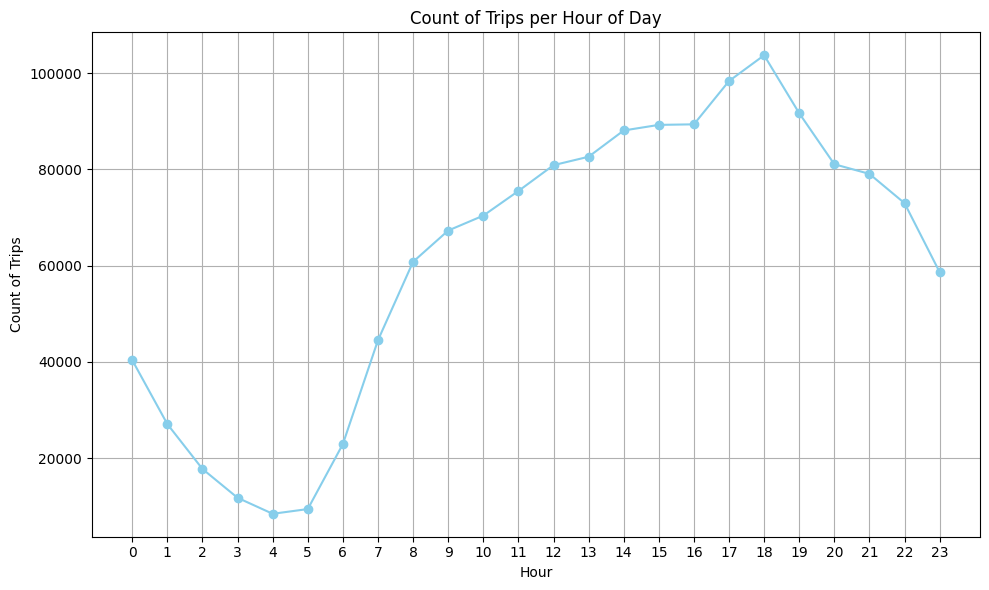

In [577]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts['pickup_hour'], hourly_counts['trip_count'], marker='o', color='skyblue')
plt.title('Count of Trips per Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count of Trips')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [578]:
busiest = hourly_counts.loc[hourly_counts['trip_count'].idxmax()]
print(f"Busiest hour: {busiest['pickup_hour']} with {busiest['trip_count']} trips.")


Busiest hour: 18 with 103701 trips.


In [579]:
##As the sampling was with 5% of the overall data,its safe to assume that the number of trips in busy hours found above is only 5% of the actual count.

## True count will be around the number of which above trip count is 5%

In [581]:
actualTripCountinBusiestHour = int((busiest['trip_count'] * 100 )/5)
actualTripCountinBusiestHour

2074020

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [590]:
# Scale up the number of trips
top_5_busiest_hours = hourly_counts.sort_values(by='trip_count', ascending=False).head(5)
top_5_busiest_hours



pickup_hour  trip_count
18           18      103701
17           17       98347
19           19       91655
16           16       89353
15           15       89236

In [591]:
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 100/5
top_5_busiest_hours ['trip_count'] = top_5_busiest_hours['trip_count'] * sample_fraction
print(top_5_busiest_hours)

    pickup_hour  trip_count
18           18  2074020.00
17           17  1966940.00
19           19  1833100.00
16           16  1787060.00
15           15  1784720.00


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [600]:
# Compare traffic trends for the week days and weekends
sample_data_new['day_type']=''
sample_data_new['day_type'] = sample_data_new['day_of_week'].apply(
    lambda x: 'Weekend' if (int(x) >=5) else 'Weekday'
)
sample_data_new.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52             1.00   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15             1.00   
5         1  2023-01-01 00:55:02   2023-01-01 00:59:57             1.00   
6         2  2023-01-01 00:39:50   2023-01-01 00:54:29             1.00   
8         2  2023-01-01 00:43:47   2023-01-01 00:56:12             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
2           3.17        1.00                  N            79           141   
4           7.97       99.00                  N           140            17   
5           0.60        1.00                  N           237           237   
6           7.53       99.00                  N           213             7   
8           5.36       99.00                  N            88           229   

   payment_type  ...  total_amount  congestion_surcharge  Airport_fee_Total  \
2             1  ...         23.88                  2.50               0.00   
4             0  ...         49.00                  0.00               0.00   
5             1  ...         13.80                  2.50               0.00   
6             0  ...         43.02                  0.00               0.00   
8             0  ...         32.79                  0.00               0.00   

   pickup_hour  day_of_week  day_name  pickup_month  quarter  trip_duration  \
2            0            6    Sunday       2023-01   2023Q1           9.25   
4            0            6    Sunday       2023-01   2023Q1          24.00   
5            0            6    Sunday       2023-01   2023Q1           4.92   
6            0            6    Sunday       2023-01   2023Q1          14.65   
8            0            6    Sunday       2023-01   2023Q1          12.42   

   day_type  
2   Weekend  
4   Weekend  
5   Weekend  
6   Weekend  
8   Weekend  

[5 rows x 26 columns]

In [602]:
day_type_counts = sample_data_new.groupby('day_type').size().reset_index(name='trip_count')
print(day_type_counts)

  day_type  trip_count
0  Weekday     1098760
1  Weekend      373087


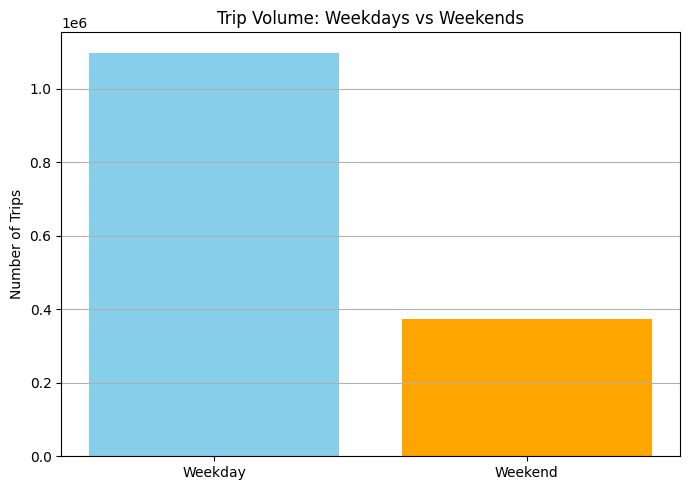

In [604]:

plt.figure(figsize=(7, 5))
plt.bar(day_type_counts['day_type'], day_type_counts['trip_count'], color=['skyblue', 'orange'])
plt.title('Trip Volume: Weekdays vs Weekends')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [ ]:
### Weekdays have cumulatively more number of trips compared to weekend days combinewd together.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



In [605]:
pickup_group = sample_data_new.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='trip_count')
pickup_group.head()

PULocationID  pickup_hour  trip_count
0             1            3           2
1             1            4           3
2             1            5           3
3             1            6           8
4             1            7           5

In [606]:
pickup_zonetotal = pickup_group.groupby('PULocationID')['trip_count'].sum().reset_index()
pickup_zonetotal.head()

PULocationID  trip_count
0             1         138
1             2           2
2             3          42
3             4        1874
4             5          13

In [607]:
top10_pickupzones = pickup_zonetotal.sort_values(by='trip_count', ascending=False).head(10)
top10_pickupzones

PULocationID  trip_count
229           237       70821
154           161       67423
125           132       65663
228           236       63941
155           162       53851
178           186       50747
131           138       49813
135           142       48181
163           170       44756
222           230       44590

In [609]:
top10_pickupdata = pickup_group[pickup_group['PULocationID'].isin(top10_pickupzones['PULocationID'])]
top10_pickupdata

PULocationID  pickup_hour  trip_count
2286           132            0        2842
2287           132            1        1335
2288           132            2         467
2289           132            3         285
2290           132            4         267
...            ...          ...         ...
4303           237           19        4322
4304           237           20        3623
4305           237           21        3512
4306           237           22        2684
4307           237           23        1403

[240 rows x 3 columns]

In [611]:
# Group by dropoff location and hour
dropoff_group = sample_data_new.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='trip_count')
# Aggregate total dropoffs per zone
dropoff_zone_total = dropoff_group.groupby('DOLocationID')['trip_count'].sum().reset_index()
# Get top 10 zones
top10_dropoff_zones = dropoff_zone_total.sort_values(by='trip_count', ascending=False).head(10)
# Merge back to get hourly data for just top 10 zones
top10_dropoff_data = dropoff_group[dropoff_group['DOLocationID'].isin(top10_dropoff_zones['DOLocationID'])]
top10_dropoff_data

DOLocationID  pickup_hour  trip_count
1460            68            0        1043
1461            68            1         724
1462            68            2         486
1463            68            3         365
1464            68            4         216
...            ...          ...         ...
5208           239           19        2938
5209           239           20        2600
5210           239           21        2405
5211           239           22        2073
5212           239           23        1431

[240 rows x 3 columns]

In [619]:
zones.head(2)

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1        0.12        0.00  Newark Airport           1     EWR   
1         2        0.43        0.00     Jamaica Bay           2  Queens   

                                            geometry  
0  POLYGON ((933100.918 192536.086, 933091.011 19...  
1  MULTIPOLYGON (((1033269.244 172126.008, 103343...

In [620]:
# Merge pickup zone names
top10_pickupdata = top10_pickupdata.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID')

# Merge dropoff zone names
top10_dropoff_data = top10_dropoff_data.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID')


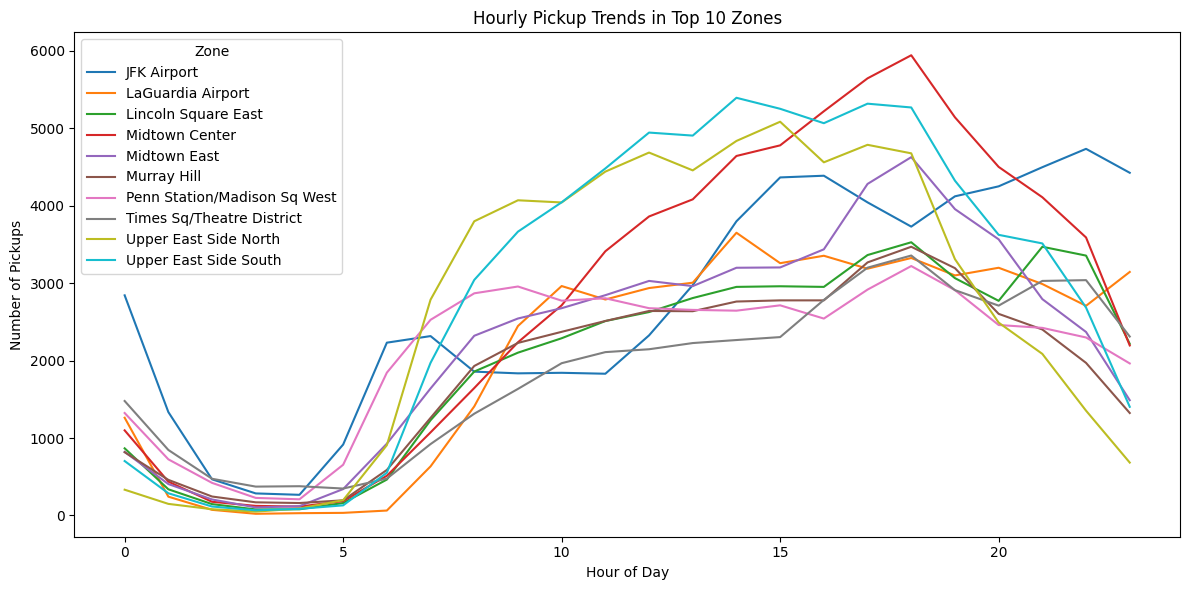

In [625]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=top10_pickupdata, x='pickup_hour', y='trip_count', hue='zone')
plt.title('Hourly Pickup Trends in Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Zone',  loc='upper left')
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [626]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = sample_data_new.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = sample_data_new.groupby('DOLocationID').size().reset_index(name='dropoff_count')
zone_ratios = pickup_counts.merge(dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')
zone_ratios.head()


PULocationID  pickup_count  DOLocationID  dropoff_count
0          1.00        138.00          1.00        3654.00
1          2.00          2.00          2.00           4.00
2          3.00         42.00          3.00         131.00
3          4.00       1874.00          4.00        5724.00
4          5.00         13.00          5.00          31.00

In [628]:
zone_ratios['PULocationID'].fillna(zone_ratios['DOLocationID'])
zone_ratios['DOLocationID'].fillna(zone_ratios['PULocationID'])
# Fill NaNs with 0
zone_ratios['pickup_count'] = zone_ratios['pickup_count'].fillna(0)
zone_ratios['dropoff_count'] = zone_ratios['dropoff_count'].fillna(0)
zone_ratios.head()

PULocationID  pickup_count  DOLocationID  dropoff_count
0          1.00        138.00          1.00        3654.00
1          2.00          2.00          2.00           4.00
2          3.00         42.00          3.00         131.00
3          4.00       1874.00          4.00        5724.00
4          5.00         13.00          5.00          31.00

In [629]:
zone_ratios = zone_ratios[zone_ratios['dropoff_count'] > 0].copy()
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / zone_ratios['dropoff_count']


In [630]:
# Top 10 zones with highest pickup/dropoff ratio
top10_ratios = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
# Bottom 10 zones with lowest pickup/dropoff ratio
bottom10_ratios = zone_ratios.sort_values(by='pickup_dropoff_ratio').head(10)
print("Top 10 Pickup/Dropoff Ratios:")
print(top10_ratios[['PULocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])
print("\n Bottom 10 Pickup/Dropoff Ratios:")
print(bottom10_ratios[['PULocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


Top 10 Pickup/Dropoff Ratios:
     PULocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
69          70.00       6470.00         775.00                  8.35
127        132.00      65663.00       14632.00                  4.49
133        138.00      49813.00       18912.00                  2.63
181        186.00      50747.00       31637.00                  1.60
109        114.00      18681.00       13787.00                  1.35
42          43.00      22603.00       16855.00                  1.34
244        249.00      31968.00       24346.00                  1.31
157        162.00      53851.00       42615.00                  1.26
99         100.00      23505.00       19183.00                  1.23
158        163.00      41817.00       35260.00                  1.19

 Bottom 10 Pickup/Dropoff Ratios:
     PULocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
29          30.00          0.00          14.00                  0.00
171        176.00          0.00       

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [631]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_data = sample_data_new[(sample_data_new['pickup_hour'] >= 23) | (sample_data_new['pickup_hour'] <= 5)]
top_night_pickups = (
    night_data.groupby('PULocationID')
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)
top_night_pickups

PULocationID  pickup_count
70             79         12260
114           132         10536
223           249          9718
42             48          8119
130           148          7332
98            114          6648
205           230          6207
164           186          5523
145           164          4927
59             68          4856

In [632]:
top_night_dropoffs = (
    night_data.groupby('DOLocationID')
    .size()
    .reset_index(name='dropoff_count')
    .sort_values(by='dropoff_count', ascending=False)
    .head(10)
)
top_night_dropoffs

DOLocationID  dropoff_count
77             79           6314
46             48           5403
163           170           4837
66             68           4575
101           107           4436
134           141           4217
254           263           4044
240           249           3791
220           229           3515
230           239           3500

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [634]:
# Filter for night hours (11 PM to 5 AM)
night_data = sample_data_new[(sample_data_new['pickup_hour'] >= 23) | (sample_data_new['pickup_hour'] <= 5)]
total_revenue = sample_data_new['total_amount'].sum()
night_revenue = night_data['total_amount'].sum()
night_revenue_share = night_revenue / total_revenue
night_revenue_share

print(f"Night Hour Revenue (11PM–5AM): ${night_revenue:,.2f}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Night Hour Revenue Share: {night_revenue_share:.2%}")

Night Hour Revenue (11PM–5AM): $5,090,191.11
Total Revenue: $41,551,583.13
Night Hour Revenue Share: 12.25%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [635]:
# Analyse the fare per mile per passenger for different passenger counts
valid_data = sample_data_new[ (sample_data_new['trip_distance'] > 0) & (sample_data_new['fare_amount'] > 0) & (sample_data_new['passenger_count'] > 0)]
valid_data['fare_per_mile_per_passenger'] = (valid_data['fare_amount'] / (valid_data['trip_distance'] * valid_data['passenger_count']))



C:\Users\Shanks\AppData\Local\Temp\ipykernel_28304\649146026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['fare_per_mile_per_passenger'] = (valid_data['fare_amount'] / (valid_data['trip_distance'] * valid_data['passenger_count']))


In [636]:
fare_analysis = valid_data.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
fare_analysis.columns = ['passenger_count', 'avg_fare_per_mile_per_passenger']


In [637]:
print("Average Fare per Mile per Passenger by Passenger Count:")
print(fare_analysis.sort_values(by='passenger_count'))


Average Fare per Mile per Passenger by Passenger Count:
   passenger_count  avg_fare_per_mile_per_passenger
0             1.00                            10.95


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [639]:
# Compare fare per mile for different vendors
valid_data = sample_data_new[
    (sample_data_new['trip_distance'] > 0) & 
    (sample_data_new['fare_amount'] > 0)
].copy()


In [640]:
valid_data['fare_per_mile'] = valid_data['fare_amount'] / valid_data['trip_distance']


In [642]:
fare_by_vendor_hour = valid_data.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()
fare_by_vendor_hour.rename(columns={'fare_per_mile': 'avg_fare_per_mile'}, inplace=True)

fare_by_vendor_hour

VendorID  pickup_hour  avg_fare_per_mile
0          1            0               6.79
1          1            1               7.06
2          1            2               7.01
3          1            3               6.50
4          1            4               7.20
..       ...          ...                ...
65         6           19               5.74
66         6           20               3.89
67         6           21               4.42
68         6           22               6.17
69         6           23               4.08

[70 rows x 3 columns]

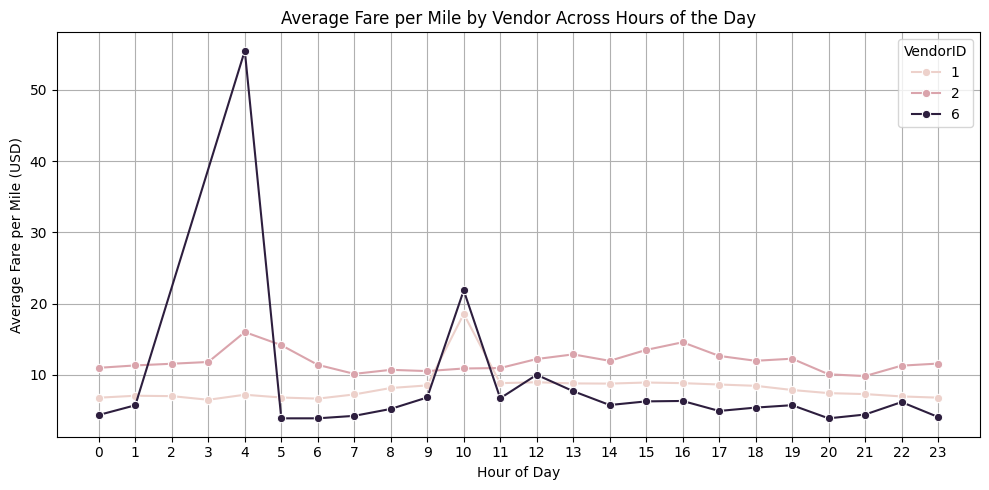

In [643]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=fare_by_vendor_hour, x='pickup_hour', y='avg_fare_per_mile', hue='VendorID', marker='o')
plt.title('Average Fare per Mile by Vendor Across Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [645]:
# Defining distance tiers
valid_data = sample_data_new[
    (sample_data_new['trip_distance'] > 0) &
    (sample_data_new['fare_amount'] > 0)
].copy()

valid_data['fare_per_mile'] = valid_data['fare_amount'] / valid_data['trip_distance']

def distance_tier(dist):
    if dist <= 2:
        return '0-2 miles'
    elif dist <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

valid_data['distance_tier'] = valid_data['trip_distance'].apply(distance_tier)

tiered_fare = valid_data.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
tiered_fare.rename(columns={'fare_per_mile': 'avg_fare_per_mile'}, inplace=True)



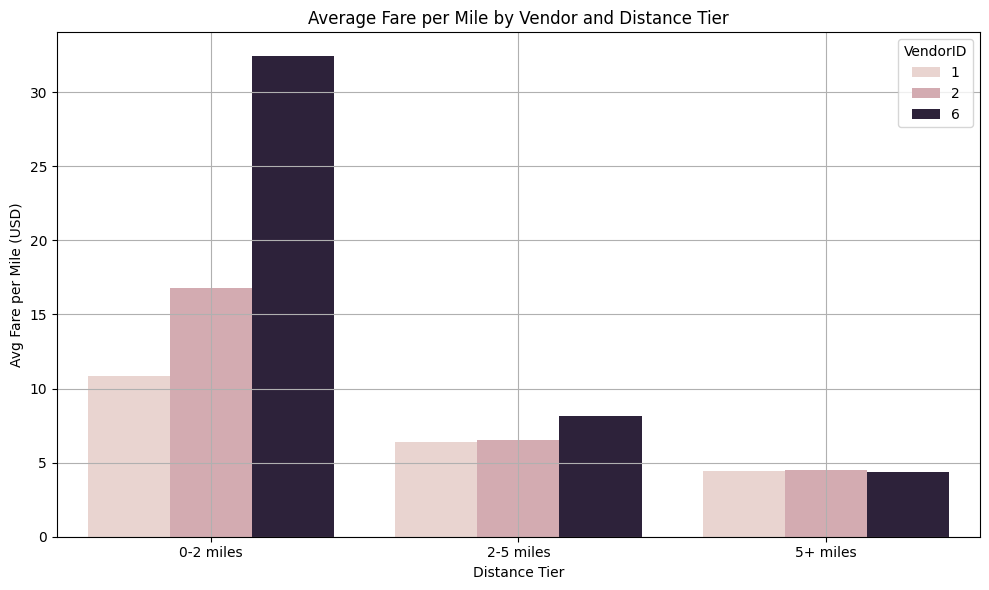

In [646]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fare, x='distance_tier', y='avg_fare_per_mile', hue='VendorID')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Avg Fare per Mile (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [647]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
valid_data['tip_percentage'] = (valid_data['tip_amount'] / valid_data['fare_amount']) * 100
valid_data['distance_tier'] = valid_data['trip_distance'].apply(distance_tier)

tip_by_distance = valid_data.groupby('distance_tier')['tip_percentage'].mean().reset_index()
tip_by_passenger = valid_data.groupby('passenger_count')['tip_percentage'].mean().reset_index()

valid_data['pickup_hour'] = valid_data['tpep_pickup_datetime'].dt.hour
tip_by_hour = valid_data.groupby('pickup_hour')['tip_percentage'].mean().reset_index()



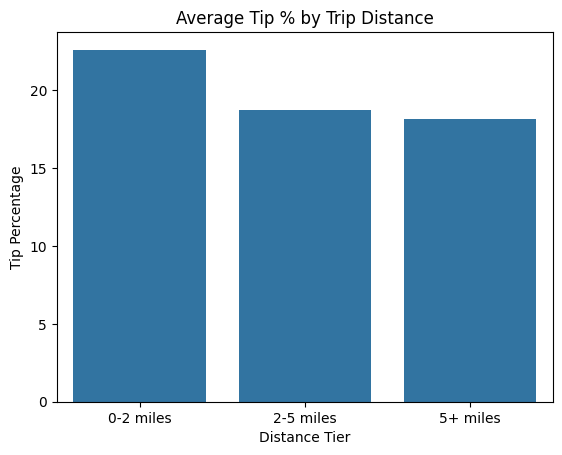

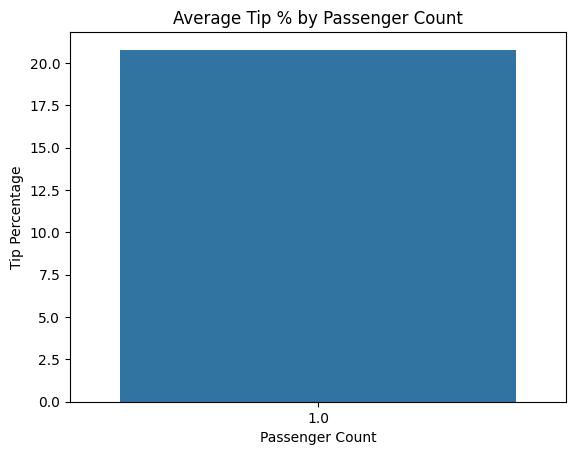

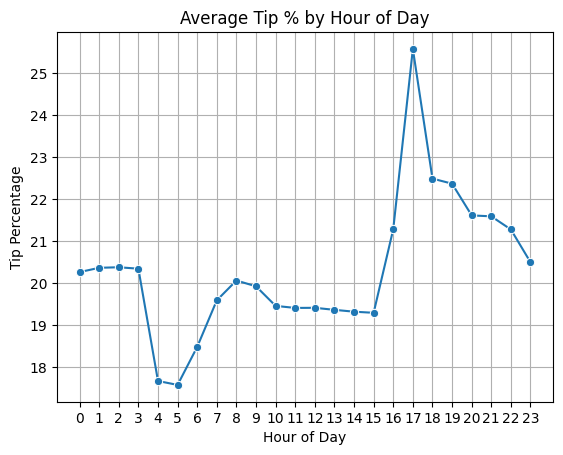

In [648]:
#Tip by distance
sns.barplot(data=tip_by_distance, x='distance_tier', y='tip_percentage')
plt.title('Average Tip % by Trip Distance')
plt.ylabel('Tip Percentage')
plt.xlabel('Distance Tier')
plt.show()

#Tip by passenger count
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percentage')
plt.title('Average Tip % by Passenger Count')
plt.ylabel('Tip Percentage')
plt.xlabel('Passenger Count')
plt.show()

#Tip by pickup hour
sns.lineplot(data=tip_by_hour, x='pickup_hour', y='tip_percentage', marker='o')
plt.title('Average Tip % by Hour of Day')
plt.ylabel('Tip Percentage')
plt.xlabel('Hour of Day')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [650]:
# See how passenger count varies across hours and days

hourly_passenger_avg = sample_data_new.groupby('pickup_hour')['passenger_count'].mean().reset_index()
daily_passenger_avg = sample_data_new.groupby('day_name')['passenger_count'].mean().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passenger_avg['day_name'] = pd.Categorical(daily_passenger_avg['day_name'], categories=day_order, ordered=True)
daily_passenger_avg.sort_values('day_name', inplace=True)



In [652]:
daily_passenger_avg.head(10)

day_name  passenger_count
1     Monday             1.00
5    Tuesday             1.00
6  Wednesday             1.00
4   Thursday             1.00
0     Friday             1.00
2   Saturday             1.00
3     Sunday             1.00

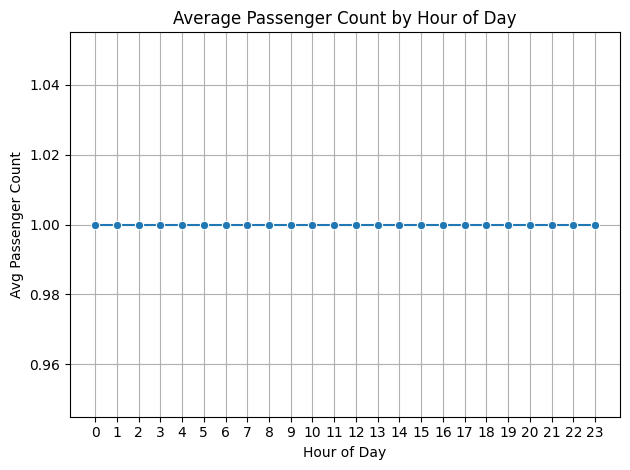

In [653]:
sns.lineplot(data=hourly_passenger_avg, x='pickup_hour', y='passenger_count', marker='o')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Passenger Count')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()



C:\Users\Shanks\AppData\Local\Temp\ipykernel_28304\3892188649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_passenger_avg, x='day_name', y='passenger_count', palette='crest')


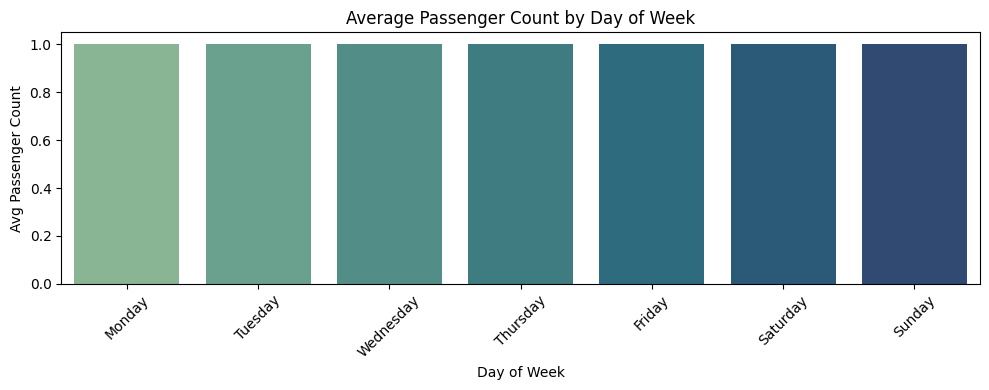

In [655]:
# Daily plot
plt.figure(figsize=(10, 4))
sns.barplot(data=daily_passenger_avg, x='day_name', y='passenger_count', palette='crest')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Passenger Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [656]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_zone = sample_data_new.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
avg_passenger_by_zone.head()

PULocationID  avg_passenger_count
0             1                 1.00
1             2                 1.00
2             3                 1.00
3             4                 1.00
4             5                 1.00

In [660]:
#Count number of trips per zone (using PULocationID)
trip_counts = sample_data_new.groupby('PULocationID').size().reset_index(name='number_of_trips')

#Merge into the zone GeoDataFrame
zones_with_trips = zones.merge(trip_counts, how='left', left_on='LocationID', right_on='PULocationID')


In [661]:
zones_with_trips = zones_with_trips.merge(
    avg_passenger_by_zone,
    how='left',
    left_on='LocationID',
    right_on='PULocationID'
)

In [662]:
zones_with_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1        0.12        0.00           Newark Airport           1   
1         2        0.43        0.00              Jamaica Bay           2   
2         3        0.08        0.00  Allerton/Pelham Gardens           3   
3         4        0.04        0.00            Alphabet City           4   
4         5        0.09        0.00            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID_x  number_of_trips  PULocationID_y  avg_passenger_count  
0            1.00           138.00            1.00                 1.00  
1            2.00             2.00            2.00                 1.00  
2            3.00            42.00            3.00                 1.00  
3            4.00          1874.00            4.00                 1.00  
4            5.00            13.00            5.00                 1.00

In [663]:
zones_with_trips[['zone', 'number_of_trips', 'avg_passenger_count']].sort_values(by='avg_passenger_count', ascending=False).head(10)


zone  number_of_trips  avg_passenger_count
0            Newark Airport           138.00                 1.00
1               Jamaica Bay             2.00                 1.00
168              Mount Hope            80.00                 1.00
169             Murray Hill         44756.00                 1.00
170      Murray Hill-Queens            28.00                 1.00
171  New Dorp/Midland Beach             1.00                 1.00
172            North Corona            55.00                 1.00
173                 Norwood            69.00                 1.00
174         Oakland Gardens            28.00                 1.00
176              Ocean Hill           136.00                 1.00

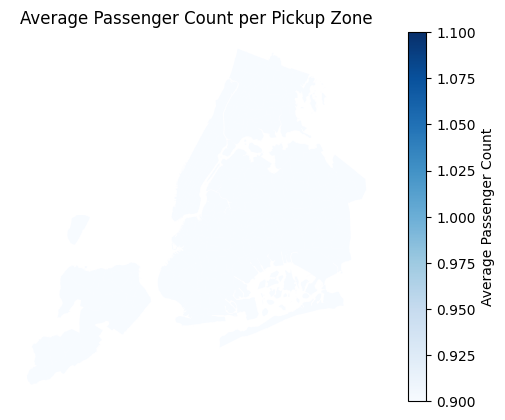

In [668]:
fig, ax = plt.subplots(1, 1)
zones_with_trips.plot(
    column='avg_passenger_count',
    ax=ax,
    legend=True,
    cmap='Blues',
    legend_kwds={'label': "Average Passenger Count", 'orientation': "vertical"}
)
plt.title("Average Passenger Count per Pickup Zone")
plt.axis('off')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [675]:
# How often is each surcharge applied?

surcharge_columns = [
    'extra', 
    'mta_tax', 
    'improvement_surcharge', 
    'congestion_surcharge', 
    'Airport_fee_Total'
]

surcharge_application = {}


In [676]:
for col in surcharge_columns:
    applied_count = (sample_data_new[col] > 0).sum()
    total_count = sample_data_new.shape[0]
    percent_applied = round((applied_count / total_count) * 100, 2)
    surcharge_application[col] = {
        'Applied Count': applied_count,
        'Total Trips': total_count,
        'Applied (%)': percent_applied
    }

In [677]:
surcharge_df = pd.DataFrame(surcharge_application).T
surcharge_df.sort_values('Applied (%)', ascending=False)

Applied Count  Total Trips  Applied (%)
improvement_surcharge     1470958.00   1471847.00        99.94
mta_tax                   1460039.00   1471847.00        99.20
congestion_surcharge      1296371.00   1471847.00        88.08
extra                      876699.00   1471847.00        59.56
Airport_fee_Total          115314.00   1471847.00         7.83

In [ ]:
## Observations:
## improvement_surcharge, mta_tax - are pre-dominant charges, and are alsmot always being applied.
## extra is often for rush hour or late night charges.

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

A)	Aligning Driver presence with temporary patterns:
Hourly and daily data shows there are spikes in demand at certain times, for example, night hours in few areas which might be heavily commercialized show concentrated traffic, and can be sent with more cabs to fill gaps in availability.
Increase availability of the driver fleet:
1)	During peak hours (6-9am , 4-8pm), mostly suggesting times when most folks travel for work or any generic cause.
2)	Based on busiest days (weekends, or Fridays)
3)	Based on seasonal or monthly basis


B)	Based on Zones:

Many trips originate from few zones, as not all zones have uniform demand. Based on this, we can optimize idle cab placement accordingly, based on high trip volumes.
Additionally, do not prioritize low demand zones in those particular hours.
1)	Use historical trip volume by zone per hour basis pattern to guide real time routing for cab drivers, so they can dynamically place themselves in possible high demand zones.
2)	Based on this, they can dispatch to high pick up zones during high demand hours.
3)	Avoid frequent short distance trip zones, as they waste resource in terms of time for waiting and fuel with low fare.

C)	Avoid identified slow routes:
We should avoid assigning cabs to slow routes  during specific hours, and recommend alternate nearby zones  or reroute based on identified patterns if any.

This is important as slow routes increase turn around time of trips, and drain away resources such as time, fuel, and economic potential of next trip.

D)	Incentivize Cab drivers in certain cases:
We can assign more experienced cab drivers for high efficient routes, and zone with high trip frequency  or higher tip percentage.
Incentivize drivers who work on rush hours like weekends or during office commute.
This would meet demands and also keep cab driver work force motivated enough to try for satisfactory services.

E)	Sharing trips:
During slow hours, or in zones with less trip efficiencies, we can deploy shared rides.
This can increase earnings per trip, as trips with slow turn around will earn less if number of passengers is less. If the rides are kept shared, the same trip can earn 3 to 4 times its normal value with same number of times, and fuel economy.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

A)	Rotate cabs based on zones and their hourly demands:
Following general classification can be made based on normal city life:
•	6-10 am  morning commuters
•	10 am to 4pm  afternoon commuters for sightseeing
•	4pm to 7pm  Evening office commuters
•	7pm to 12am Night life of city
•	12am to 6am  Late night life commuters, night crowd

B)	Adapting to variation during day of week:
•	Weekdays  Emphasize commercial zones (Wall Street, Midtown)
•	Fridays  Prep for early nightlife and late pickups (from 6 PM)
•	Saturdays  Focus on nightlife zones + airports (day + night demand)
•	Sundays  Deploy to hotels and religious/event venues

C)	Seasonal/Month based Adjustments:
Month based adjustments can be made by knowing the monthly patterns as well.
During winters the commute will be different compared to summer days. Or even times of holidays will impact the cab business.

Based on low or high demands, we can emphasize if mid-size of large size cabs will bring in more revenue and optimize our models.

D)	A hot spot alerts logic can be applied where, dynamically hotspot areas can be shown, and low demand cabs can be rerouted in those areas or zones to drive demand and supply balance.
E)	Night hour strategy: Position cabs 24/7 near transport hubs and where it’s a guarantee that pickups will be served.
F)	Utilize heatmap of zones for hours, days of week, months, to identify high and low demand patterns and drive.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

A)	Implement dynamic time based pricing for peak hours:
This is to justify low supply for high demand.
•	7am to 10am  10% surcharge for high office time travel demand
•	11pm t0 6 am  15% for nightly hours and low availability of drivers
•	Weekends / holidays  10% across long distance trips

This is due to the data driven fact that there are spikes in hourly and daily patterns for few impacting factors. Night hours also have high demand with fewer cabs available and customers tend to pay more to satisfy their commute demands.

B)	Surcharge based on zone:
We can have mild surcharges in mildly to highly concentrated zones where there is high demand. These can be termed as hot spot zones. 
At same time reduce fare in underutilized zones, to encourage people to book cabs more frequently and get used to its convenience.

C)	Reprice routes with more frequent trips:
Spots which have tourist attraction like stations, metros, airports, where 24/7 passengers will be coming, can be dealt with offering a minimum wage to cab drivers for a certain length of route.
This will encourage them to engage these areas consistently, and even in high demands the area can be served well, without much effort and smooth operations.

D)	Distance based plans:
Any travel which is above a certain normal acceptable range can be termed as normal operation ride. Anything beyond, can be classified as rental based on hours or ‘out station’ plan based on distance of ride.
The plans can be customized to offer discounts to more frequent customers and incentivized ride offers for cab drivers as well.


E)	Fare adjustments for Higher passenger count:
Considering the cabs run on metered ways or other factors where number passenger plays least role, it can be noted that higher passenger count can also mean low fuel economy and higher delays due to boarding time etc.
To counter this, a nominal charge can be levied on extra passenger count above an acceptable count based on our algorithm.

F)	Custom Discounts:
Offer strategic discounts to customers who are bringing more revenue and are more frequent bookers of cab service in general.
Reward tipping, by points earned by customer with every ride, encouraging message of less fare with more points earned.




